## 3.5 PCA

$N$개의 $M$차원 데이터가 있으면 보통 그 데이터들은 서로 다른 값을 가진다. 하지만 이러한 데이터 간의 변이(variation)는 무작위가 아니라 특정한 규칙에 의해 만들어지는 경우가 있다. 예를 들어 붓꽃의 꽃받침 길이는 꽃마다 다르지만 꽃받침 길이가 약 2배 커지면 꽃받침 폭도 약 2배 커지는 것이 일반적이다. 이러한 데이터 간의 변이 규칙을 찾아낼 때 PCA를 이용할 수 있다.

**PCA(Principal Component Analysis)는 주성분 분석**이라고도 하며 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다. **차원축소(dimension reduction)**라고도 한다. 더 낮은 차원의 데이터값 변화가 더 높은 차원의 데이터값 변화를 설명할 수 있다는 것은 얼핏 보기에 복잡해 보이는 고차원 데이터의 변이를 몇 가지 원인으로 설명할 수 있다는 뜻이다. 

여기에서는 몇 가지 데이터에 대해 PCA가 사용되는 예를 보인다.

### 붓꽃 데이터의 차원축소

사이킷런의 붓꽃 데이터 중에서 10송이의 데이터, 즉 10개의 표본만 선택하여 꽃받침 길이와 꽃받침 폭 데이터를 그래프로 보이면 다음과 같다.
첫 번째 그래프는 가로축을 특성의 종류, 세로축을 특성의 값으로 나타낸 것이다. 이 그래프에서 꽃받침 길이가 크면 꽃받침 폭도 같이 커진다는 규칙을 알 수 있다.

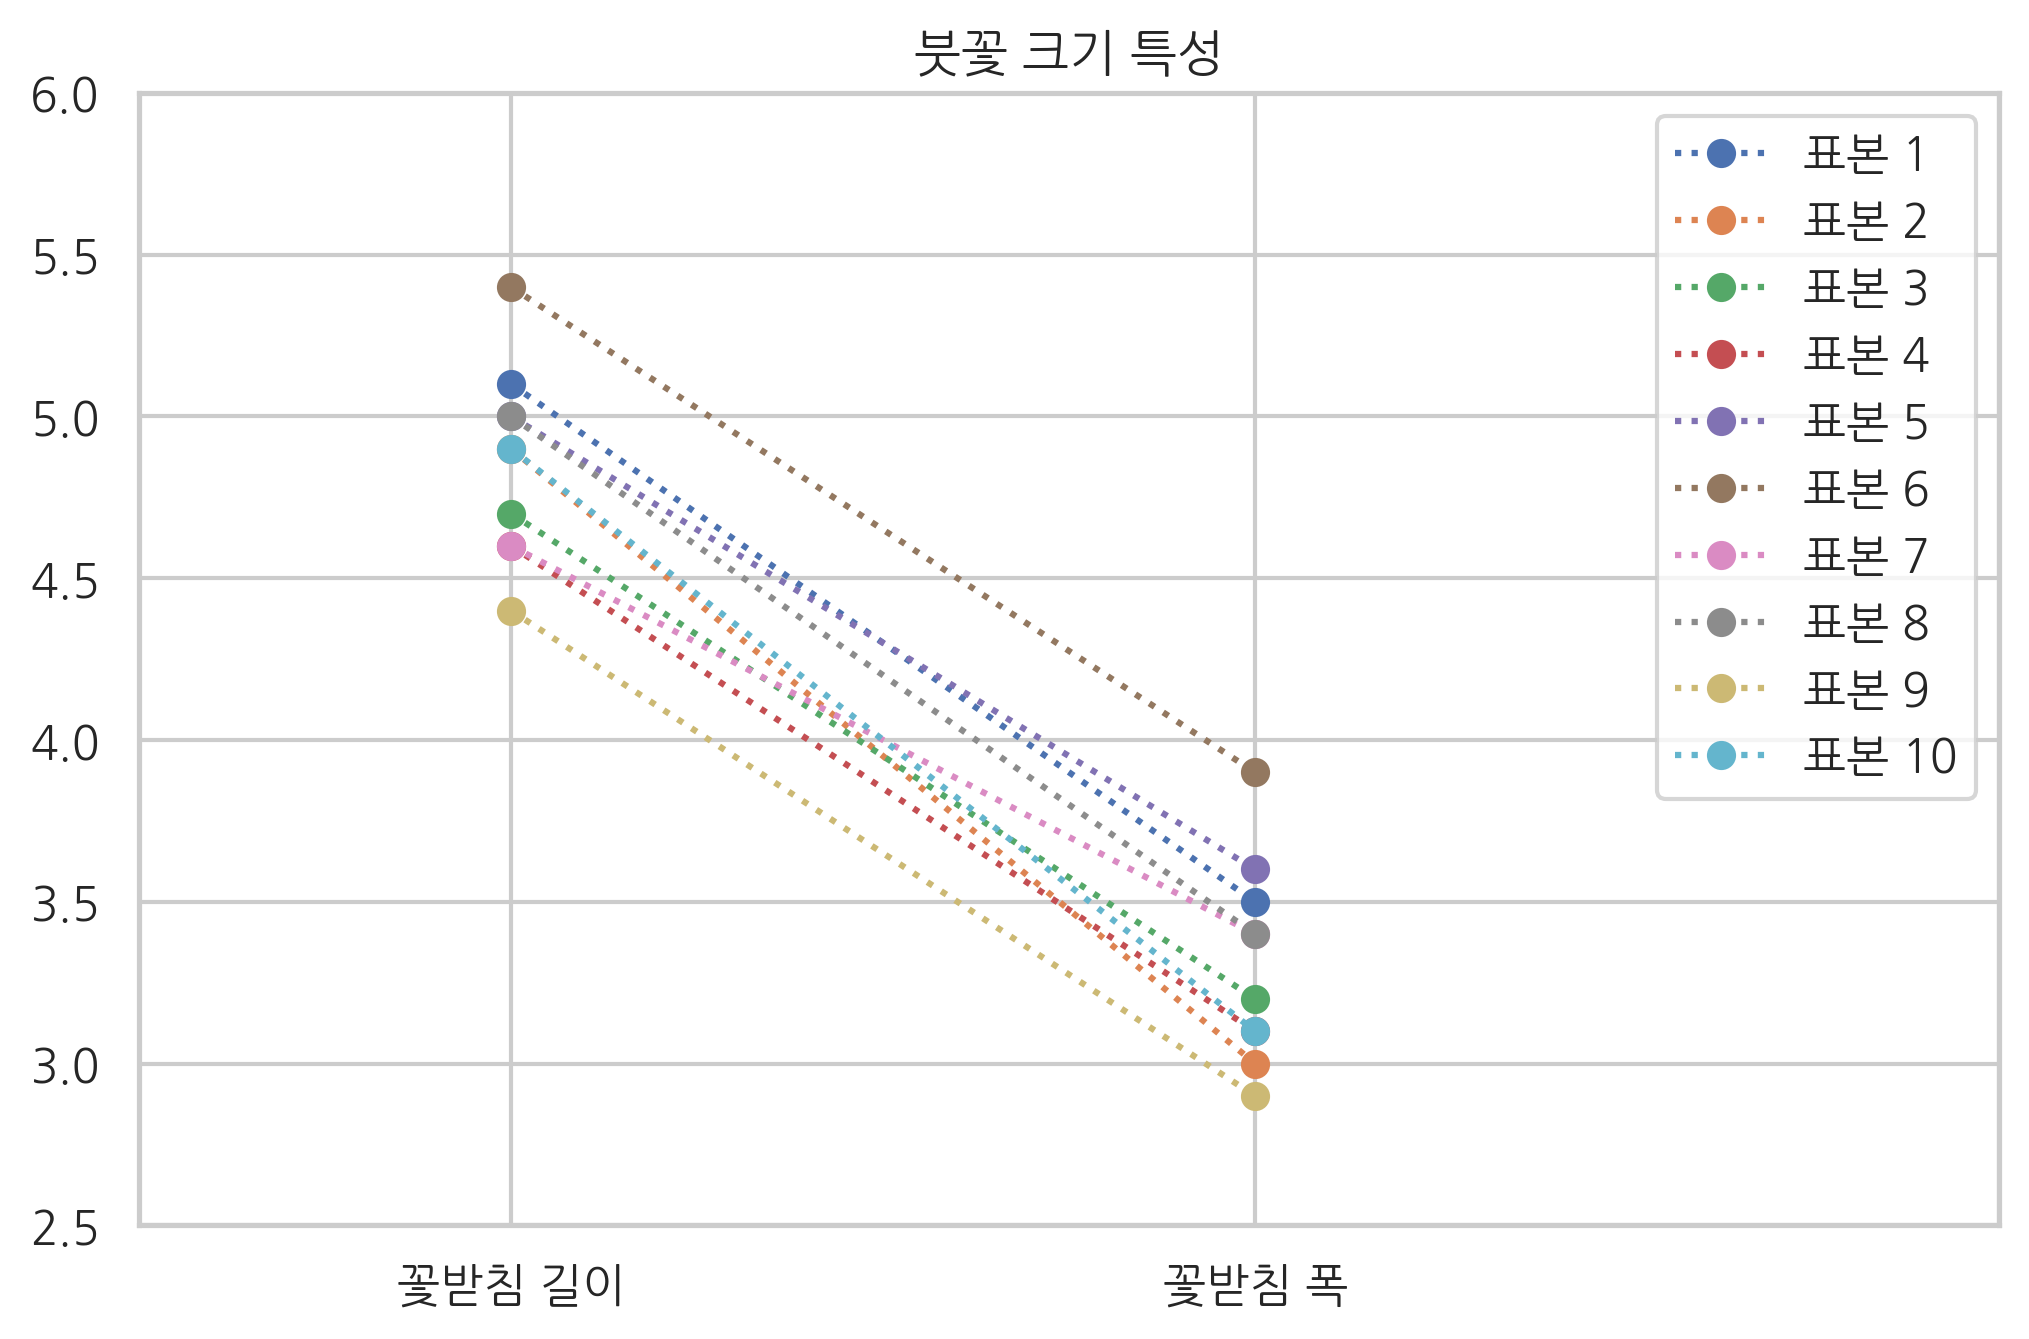

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

두 번째 그래프는 가로축을 꽃받침 길이, 세로축을 꽃받침 폭으로 하는 스캐터 플롯으로 나타낸 것이다. 데이터를 나타내는 점들이 양의 기울기를 가지기 때문에 여기에서도 마찬가지로 꽃받침 길이가 크면 꽃받침 폭도 같이 커진다는 규칙을 알 수 있다.

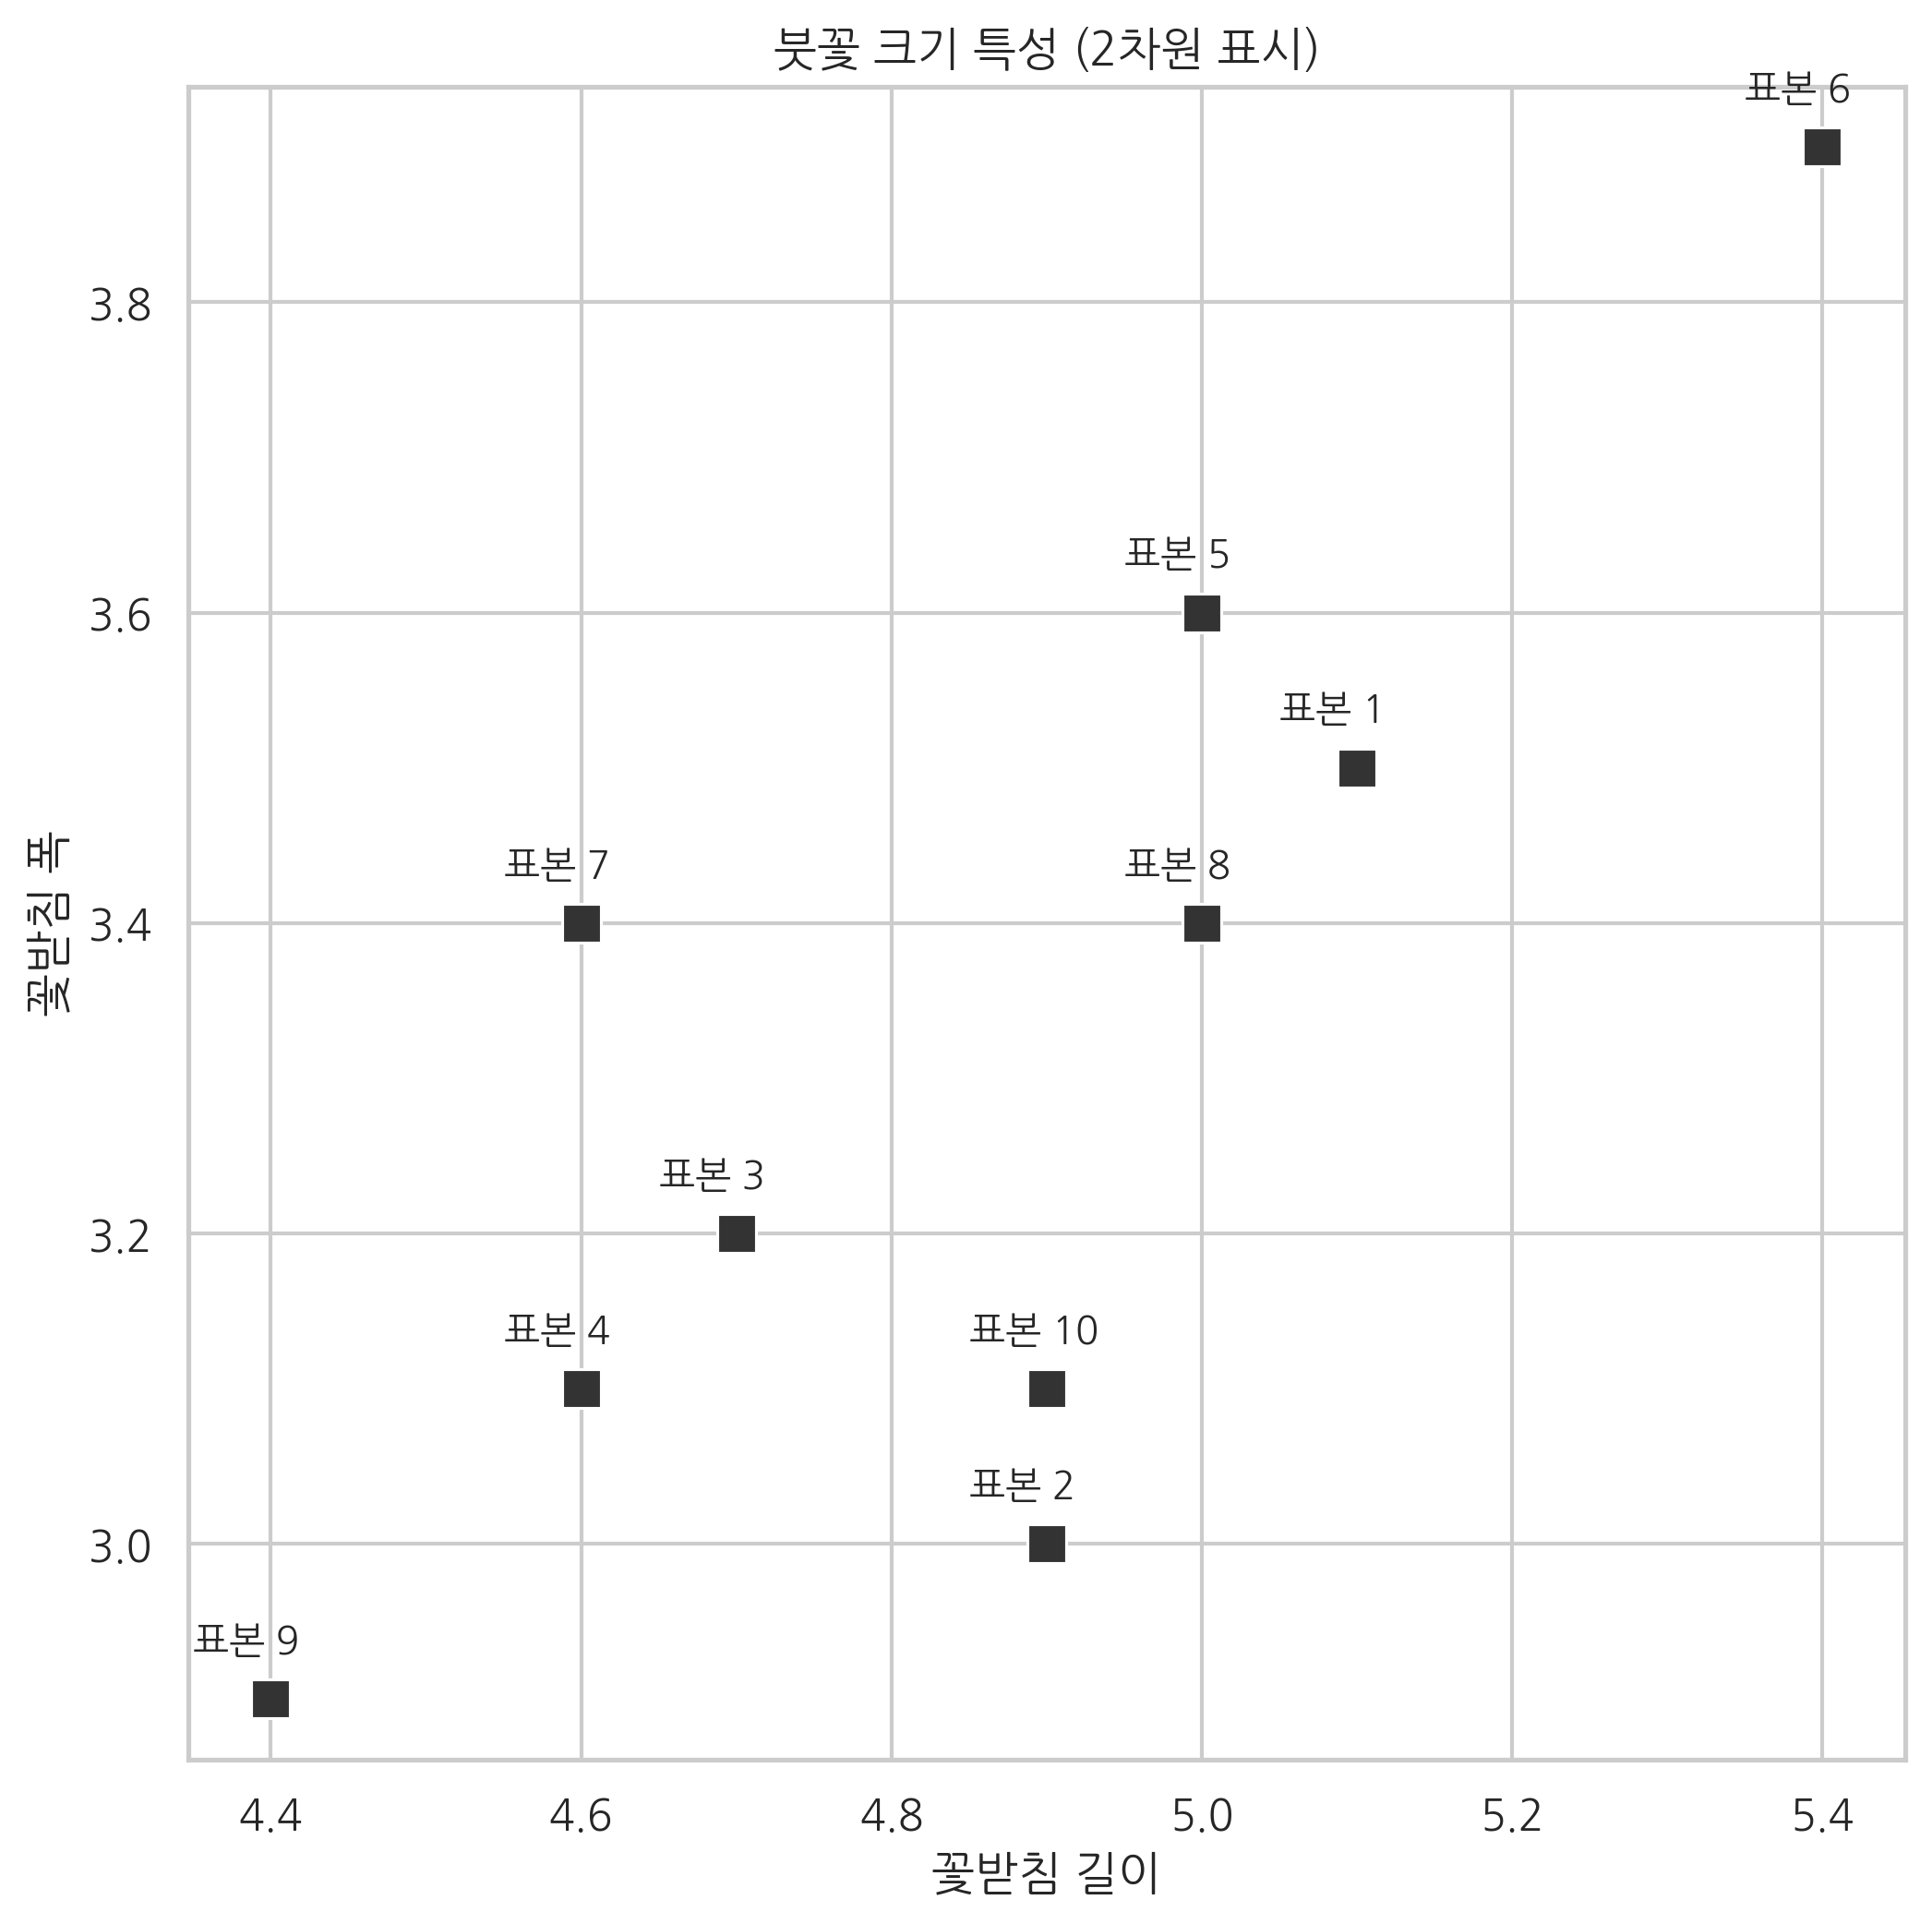

In [2]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

이 10송이의 표본은 꽃받침의 길이와 폭이 제각각이지만 그 값에는 공통적인 특징이 있다. 꽃받침 길이가 크면 꽃받침 폭도 커지며 그 비율은 거의 일정하다. 그 이유는 (꽃받침 길이, 꽃받침 폭)이라는 2차원 측정 데이터는 사실 "꽃의 크기"라는 근본적인 데이터가 두 개의 다른 형태로 표현된 것에 지나지 않기 때문이다. 바로 측정되지는 않지만 측정된 데이터의 기저에 숨어서 측정 데이터를 결정짓는 데이터를 **잠재변수(latent variable)**이라고 부른다.

PCA에서는 잠재변수와 측정 데이터가 선형적인 관계로 연결되어 있다고 가정한다. 즉, $i$번째 표본의 측정 데이터 벡터 $x_i$의 각 원소를 선형조합하면 그 뒤에 숨은 $i$번째 표본의 잠재변수 $u_i$의 값을 계산할 수 있다고 가정한다. 이를 수식으로 나타내면 다음과 같다.

$$
\begin{align}
u_i = w^Tx_i
\tag{3.5.1}
\end{align}
$$

이 식에서 $w$는 측정 데이터 벡터의 각 원소를 조합할 가중치 벡터다.

붓꽃의 예에서는 꽃받침 길이와 꽃받침 폭을 선형조합하여 꽃의 크기를 나타내는 어떤 값을 찾은 것이라고 생각할 수 있다.

$$
\begin{align}
u_i = w_1 x_{i,1} + w_2 x_{i,2}
\tag{3.5.2}
\end{align}
$$

스포츠 선수의 경우에는 경기 중 발생한 다양한 기록을 선형조합하여 기량을 나타내는 점수를 계산하는 방법을 많이 사용한다. 일례로 미식축구의 쿼터백의 경우에는 패서 레이트(passer rate)라는 점수를 이용하여 선수를 평가는데 이 값은 패스 성공 횟수(completions), 총 패싱 야드(passing yards), 터치다운 횟수(touchdowns), 인터셉션 횟수(interceptions)를 각각 패스 시도 횟수(attempts)로 나눈 값을 선형조합하여 계산한다.

$$
\begin{align}
\text{passer rating} = 
5 \cdot {\text{completions} \over \text{attempts}}
+ 0.25 \cdot {\text{passing yards} \over \text{attempts}}
+ 20 \cdot {\text{touchdowns} \over \text{attempts}} 
- 25 \cdot {\text{interceptions} \over \text{attempts}} + 0.125
\tag{3.5.3}
\end{align}
$$

선수의 실력이라고 하는 잠재변수의 값이 이 4개 수치의 선형조합으로 표현될 것이라고 가정한 것이다. 차원축소의 관점에서 보면 4차원의 데이터를 1차원으로 축소한 것이다.

### 차원축소와 투영

차원축소문제는 다차원 벡터를 더 낮은 차원의 벡터공간에 투영하는 문제로 생각하여 풀 수 있다. 즉, 특이분해에서 살펴본 로우-랭크 근사(low-rank approximation) 문제가 된다. 이 문제는 다음과 같이 서술할 수 있다.

> $N$개의 $M$차원 데이터 벡터 $x_1, x_2, \cdots, x_N$를 정규직교인 기저벡터 $w_1, w_2, \cdots, w_K$로 이루어진 $K$차원 벡터공간으로 투영하여 가장 비슷한 $N$개의 $K$차원 벡터 $x^{\Vert w}_1, x^{\Vert w}_2, \cdots, x^{\Vert w}_N$를 만들기 위한 정규직교 기저벡터 $w_1, w_2, \cdots, w_K$를 찾는다. 

다만 원래의 로우-랭크 근사문제와 달리 근사 성능을 높이기 위해 직선이 원점을 지나야 한다는 제한조건을 없애야 한다. 따라서 문제는 다음과 같이 바뀐다.

> $N$개의 $M$차원 데이터 벡터 $x_1, x_2, \cdots, x_N$에 대해 어떤 상수 벡터 $x_0$를 뺀 데이터 벡터  $x_1-x_0, x_2-x_0, \cdots, x_N-x_0$를 정규직교인 기저벡터 $w_1, w_2, \cdots, w_K$로 이루어진 $K$차원 벡터공간으로 투영하여 가장 비슷한 $N$개의 $K$차원 벡터 $x^{\Vert w}_1, x^{\Vert w}_2, \cdots, x^{\Vert w}_N$를 만들기 위한 정규직교 기저벡터 $w_1, w_2, \cdots, w_K$와 상수 벡터 $x_0$를 찾는다. 

$N$개의 데이터를 1차원 직선에 투영하는 문제라고 하면 원점을 지나는 직선을 찾는게 아니라 원점이 아닌 어떤 점 $x_0$을 지나는 직선을 찾는 문제로 바꾼 것이다.

이 문제의 답은 다음과 같다.

> **$x_0$는 데이터 벡터 $x_1, x_2, \cdots, x_N$의 평균벡터이고 $w_1, w_2, \cdots, w_K$는 가장 큰 $K$개의 특잇값에 대응하는 오른쪽 특이벡터 $v_1, v_2, \cdots, v_K$이다.**

### PCA의 수학적 설명

$M$ 차원의 데이터 $x$가 $N$개 있으면 이 데이터는 특징 행렬 $X \in \mathbf{R}^{N\times M}$로 나타낼 수 있다.
이 데이터를 가능한 한 쓸모 있는 정보를 유지하면서 더 적은  차원인 $K (K < M)$ 차원의 차원축소 벡터 $\hat{x}$으로 선형변환하고자 한다. 
예를 들면 3차원 상의 데이터 집합을 2차원 평면에 투영하여 새로운 데이터 집합을 만들 때 어떤 평면을 선택해야 원래의 데이터와 투영된 데이터가 가장 차이가 적을까? 이 평면을 찾는 문제와 같다. 여기에서는 설명을 단순하게 하기 위해 데이터가 원점을 중심으로 퍼져 있다고 가정한다.
데이터가 원점을 중심으로 존재하는 경우에는 벡터에 변환행렬을 곱하는 연산으로 투영 벡터를 계산할 수 있다. 다음처럼 데이터 $x$에 변환행렬 $W \in \mathbf{R}^{K \times M}$를 곱해서 새로운 데이터 $\hat{x}_i$를 구하는 연산을 생각하자.

$$
\begin{align}
\hat{x}_i = W x_i
\tag{3.5.4}
\end{align}
$$

$$
\begin{align}
x \in \mathbf{R}^M,\; W \in \mathbf{R}^{K \times M},\; \hat{x} \in \mathbf{R}^K
\tag{3.5.5}
\end{align}
$$

모든 데이터 $x_i (i=1, \cdots, N)$에 대해 변환을 하면 벡터가 아닌 행렬로 표현할 수 있다.

$$
\begin{align}
\hat{X} = XW^{T}
\tag{3.5.6}
\end{align}
$$

$$
\begin{align}
X \in \mathbf{R}^{N \times M},\; \hat{X} \in \mathbf{R}^{N \times K}, W^T \in \mathbf{R}^{M \times K}
\tag{3.5.7}
\end{align}
$$

이 식에서 행렬 $X$는 벡터 $x_i (i=1, \cdots, N)$를 행으로 가지는 행렬이고 행렬 $\hat{X}$는 벡터 $\hat{x}_i (i=1, \cdots, N)$를 행으로 가지는 행렬이다.

PCA의 목표는 변환 결과인 차원축소 벡터 $\hat{x}_i$가 정보가 원래의 벡터 $x_i$가 가졌던 정보와 가장 유사하게 되는 변환행렬 $W$값을 찾는 것이다. 

그러나 $\hat{x}_i$는 $K$ 차원 벡터로 원래의 $M$ 차원 벡터 $x_i$와 차원이 다르기 때문에 직접 두 벡터의 유사도를 비교할 수 없다. 따라서 $\hat{x}_i$를 도로 $M$ 차원 벡터로 선형 변형하는 역변환행렬 $U \in \mathbf{R}^{M \times K}$도 같이 찾아야 한다. 
그러면 원래의 데이터 벡터 $x$를 더 낮은 차원의 데이터 $\hat{x} = Wx $으로 변환했다가 다시 원래의 차원으로 되돌릴 수 있다. 도로 $M$차원으로 변환된 벡터를 $\hat{\hat{x}}$라고 하자.

$$ 
\begin{align}
\hat{\hat{x}} = U \hat{x}  
\tag{3.5.8}
\end{align}
$$

$$
\begin{align}
\hat{x} \in \mathbf{R}^K,\; U \in \mathbf{R}^{M \times K},\; \hat{\hat{x}} \in \mathbf{R}^M
\tag{3.5.9}
\end{align}
$$

물론 이렇게 변환과 역변환을 통해 원래의 차원으로 되돌린 벡터 $U \hat{x}$은 원래의 벡터 $x$와 비슷할 뿐 정확히 같지는 않다. 다만 이 값을 다시 한번 차원 축소 변환하면 도로 $\hat{x}$가 된다. 즉,

$$
\begin{align}
W \hat{\hat{x}} = W U \hat{x} = \hat{x}
\tag{3.5.10}
\end{align}
$$

따라서 $W$와 $U$는 다음 관계가 있다.

$$
\begin{align}
WU = I
\tag{3.5.11}
\end{align}
$$

역변환행렬 $U$을 알고 있다고 가정하고 역변환을 했을 때 원래 벡터 $x$와 가장 비슷해지는 차원축소 벡터 $\hat{x}$를 다음과 같이 최적화를 이용하여 찾는다.

$$
\begin{align}
\arg\min_{\hat{x}} || x - U \hat{x} ||^2
\tag{3.5.12}
\end{align}
$$

목적함수는 다음과 같이 바꿀 수 있다.

$$
\begin{align}
\begin{aligned}
|| x - U \hat{x} ||^2 
&= (x - U \hat{x})^T (x - U \hat{x}) \\
&= x^Tx - \hat{x}^T U^T {x}  - x^T U \hat{x} + \hat{x}^T U^T U \hat{x} \\
&= x^Tx - 2 x^T U \hat{x} + \hat{x}^T  \hat{x} \\
\end{aligned}
\tag{3.5.13}
\end{align}
$$

이 목적함수를 최소화하려면 $\hat{x}$로 미분한 식이 영벡터가 되는 값을 찾아야 한다. 이 부분은 행렬의 미분과 최적화 부분에서 배우게 된다. 여기에서는 일단 미리 풀이 과정을 제시한다. 

위 목적함수를 미분한 식은 다음과 같다.

$$
\begin{align}
- 2 U^Tx + 2\hat{x} = 0
\tag{3.5.14}
\end{align}
$$

이 식을 정리하면 

$$
\begin{align}
\hat{x} = U^Tx
\tag{3.5.15}
\end{align}
$$

가 된다. 원래의 변환식 

$$
\begin{align}
\hat{x} = Wx
\tag{3.5.16}
\end{align}
$$

과 비교하면

$$
\begin{align}
U = W^{T}
\tag{3.5.17}
\end{align}
$$

임을 알 수 있다. 따라서 다음 식이 성립한다.

$$
\begin{align}
WW^{T} = I
\tag{3.5.18}
\end{align}
$$


이제 남은 문제는 최적의 변환 행렬 $W$을 찾는 것이다. 이 경우의 최적화 문제는 다음과 같이 된다.

$$
\begin{align}
\arg\min_{W} \sum_{i=1}^N || x_i - W^{T} W x_i ||^2
\tag{3.5.19}
\end{align}
$$

모든 데이터에 대해 적용하면 목적함수는 다음처럼 바뀐다.

$$
\begin{align}
\arg\min_{W} || X - X W^{T} W ||^2
\tag{3.5.20}
\end{align}
$$

이 문제는 랭크-$K$ 근사문제이므로 W는 가장 큰  𝐾 개의 특잇값에 대응하는 오른쪽 특이벡터로 만들어진 행렬이다.

### 사이킷런의 PCA 기능

사이킷런의 decomposition 서브패키지는 PCA 분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * `n_components` : 정수

* 메서드:	
  * `fit_transform()` : 특징행렬을 낮은 차원의 근사행렬로 변환
  * `inverse_transform()` : 변환된 근사행렬을 원래의 차원으로 복귀

* 속성:	
 * `mean_` : 평균 벡터
 * `components_` : 주성분 벡터

다음 코드는 붓꽃 데이터를 1차원으로 차원축소(근사)하는 예제 코드다.

`fit_transform()` 메서드로 구한 `X_low`는 1차원 근사 데이터의 집합이다. 이 값을 다시 `inverse_transform()` 메서드에 넣어서 구한 `X2`는 다시 2차원으로 복귀한 근사 데이터의 집합이다.

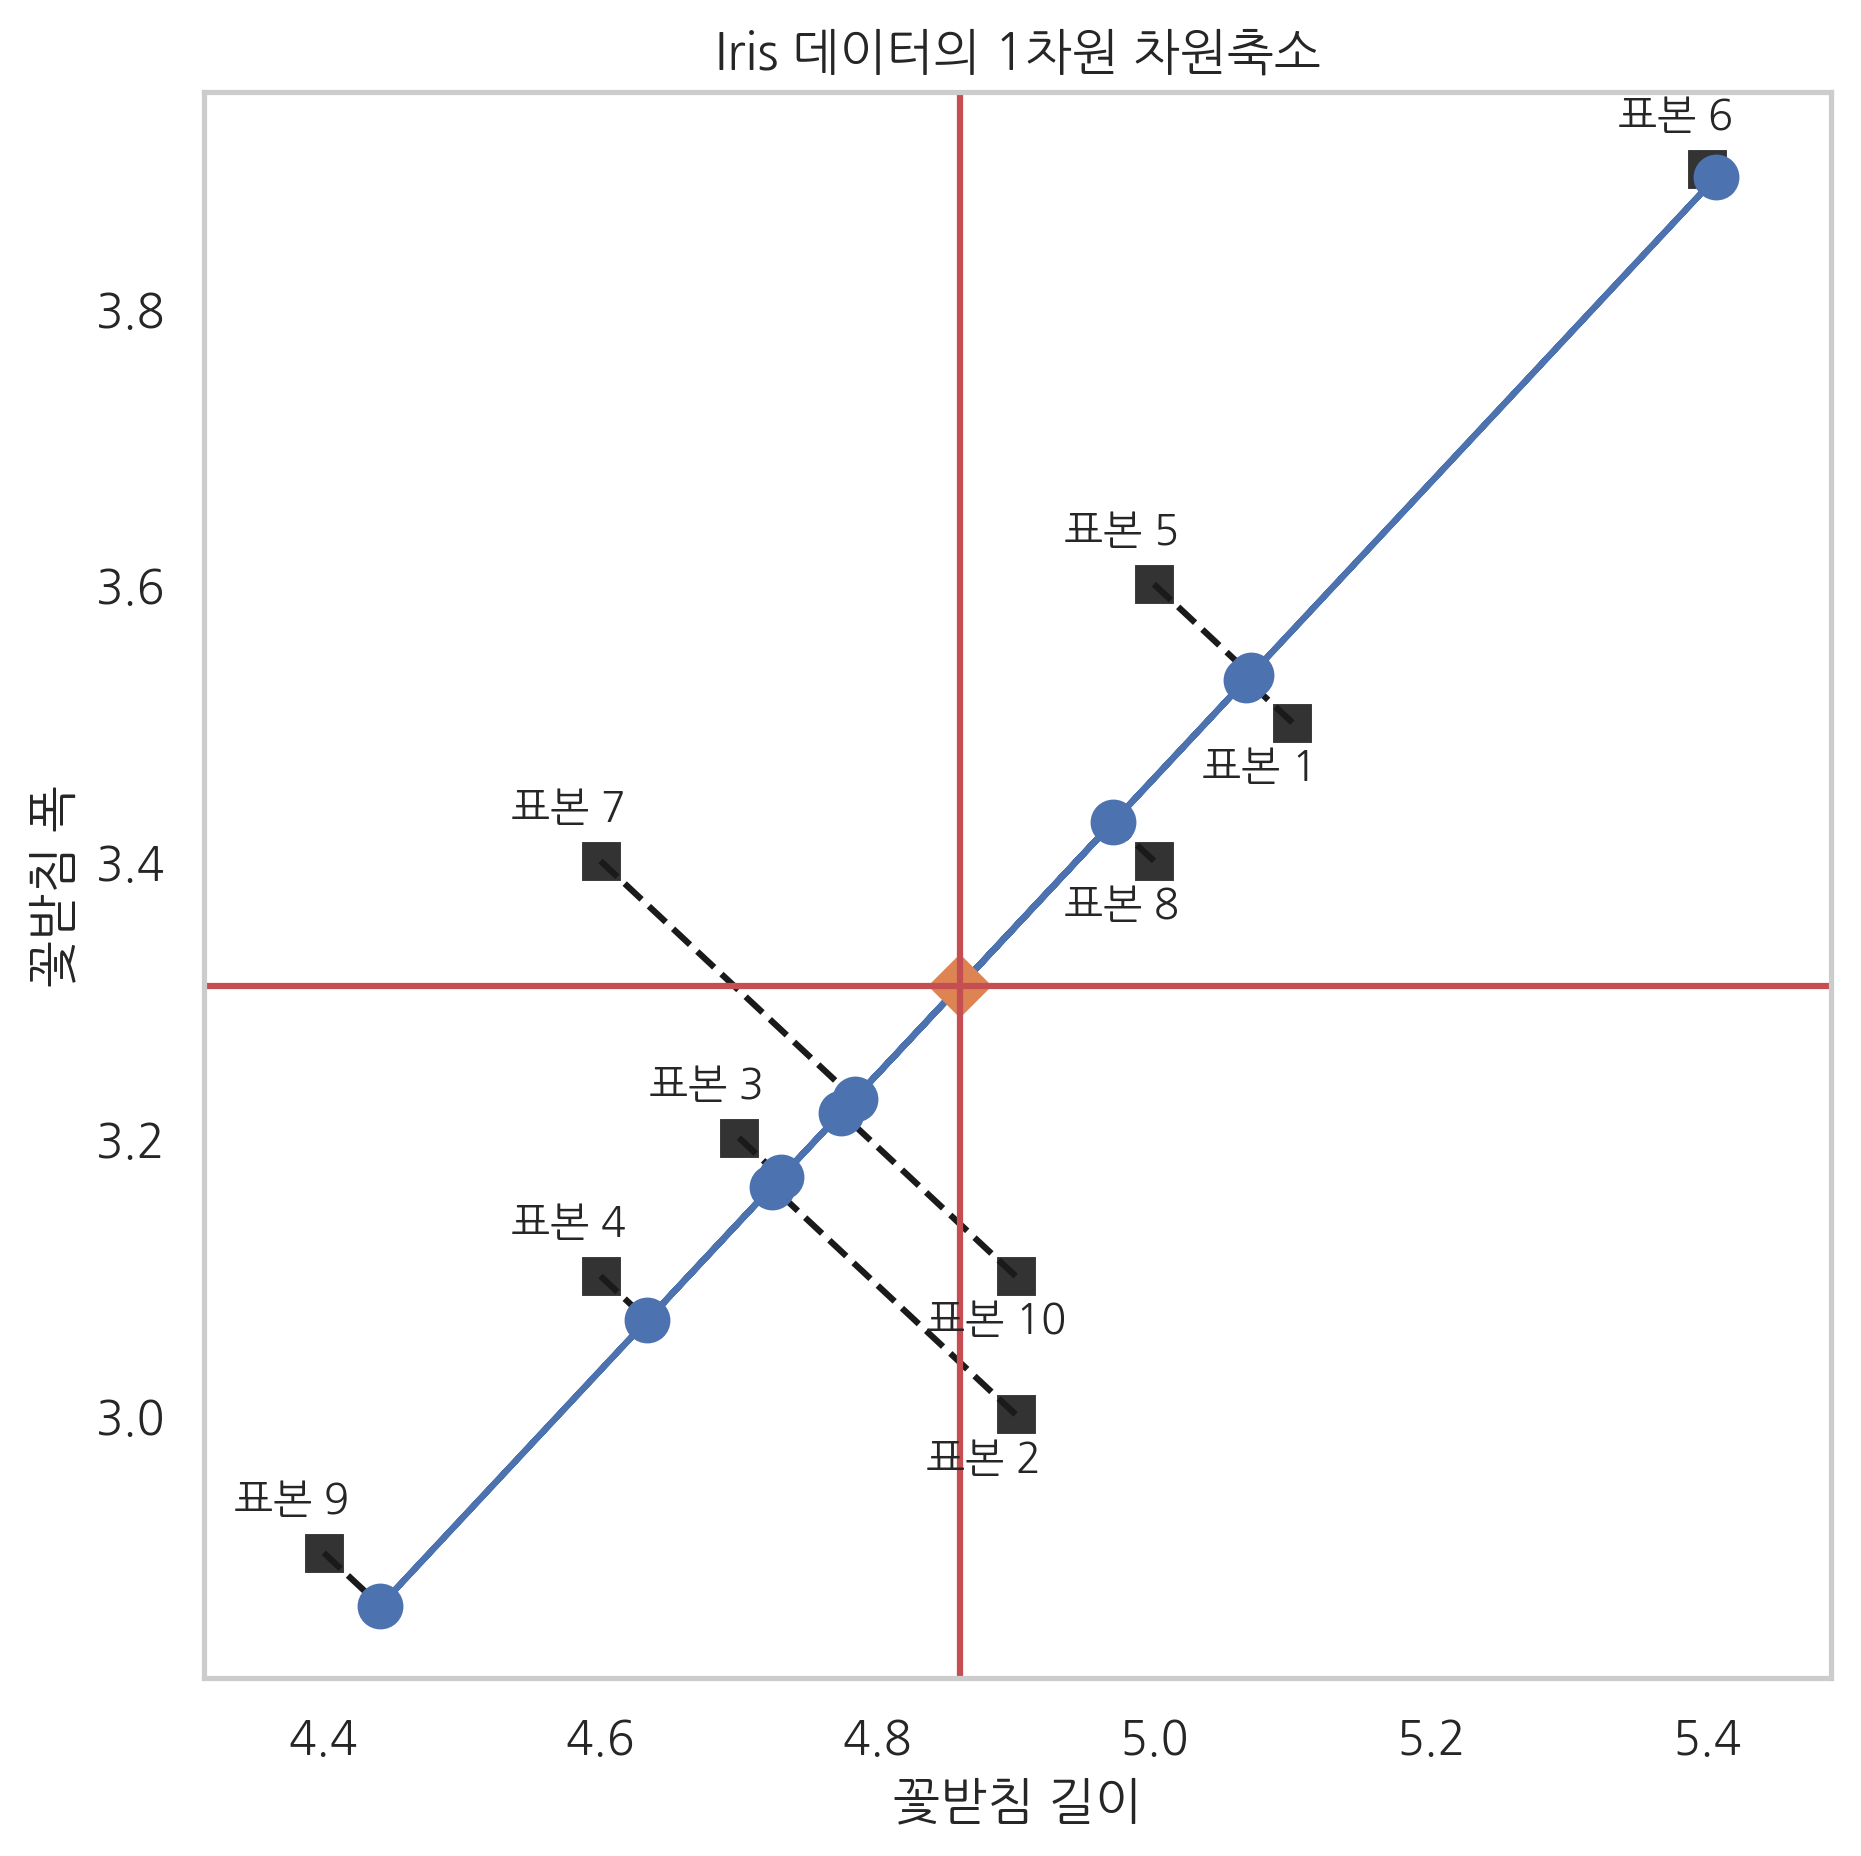

In [3]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

데이터의 평균값은 `mean_` 속성으로 볼 수 있다.

In [4]:
pca1.mean_

array([4.86, 3.31])

주성분 벡터 즉, 가장 근사 데이터를 만드는 단위기저벡터는 `components_` 속성에서 구할 수 있다. 벡터의 값은 (0.68, 0.73)이다.

In [5]:
pca1.components_

array([[0.68305029, 0.73037134]])

이 값은 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫 번째(가장 큰 고윳값에 대응하는) 고유벡터에 해당한다. 고유벡터의 부호 즉 방향은 반대가 될 수도 있다.

넘파이로 첫 번째 오른쪽 특이벡터를 구하면 (0.68, 0.73)임을 알 수 있다.

In [6]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [7]:
VT[:, 0]

array([-0.68305029, -0.73037134])

고유값 분해를 할 때는 넘파이가 고유값의 순서에 따른 정렬을 해주지 않으므로 사용자가 정렬해야 한다.

In [8]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [9]:
W

array([0.17107711, 1.44192289])

In [10]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [11]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

예를 들어 8번째 꽃의 꽃받침 길이와 꽃받침 폭은 다음과 같다.

In [12]:
X[7, :]

array([5. , 3.4])

PCA로 구한 주성분의 값 즉, 꽃의 크기는 다음과 같다.

In [13]:
X_low[7]

array([0.16136046])

이 값은 다음처럼 구할 수도 있다.

In [14]:
pca1.components_ @ (X[7, :] - pca1.mean_)

array([0.16136046])

이 주성분의 값을 이용하여 다시 2차원 값으로 나타낸 근사값은 다음과 같다.

In [15]:
X2[7, :]

array([4.97021731, 3.42785306])

#### 연습 문제 3.5.1

붓꽃 데이터 중 앞에서 50개의 데이터(setosa 종)에 대해 다음 문제를 풀어라.

(1) 꽃잎의 길이와 꽃잎의 폭을 이용하여 1차원 PCA를 수행하라. 꽃의 크기는 꽃받침 길이와 꽃받침 폭의 어떤 선형조합으로 나타나는가?

(2) 꽃받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형조합으로 나타나는가?

### 이미지 PCA

이번에는 사람의 얼굴 데이터를 PCA로 분석하자. 올리베티 얼굴 사진 중 특정 인물의 사진 10장을 데이터로 사용한다.

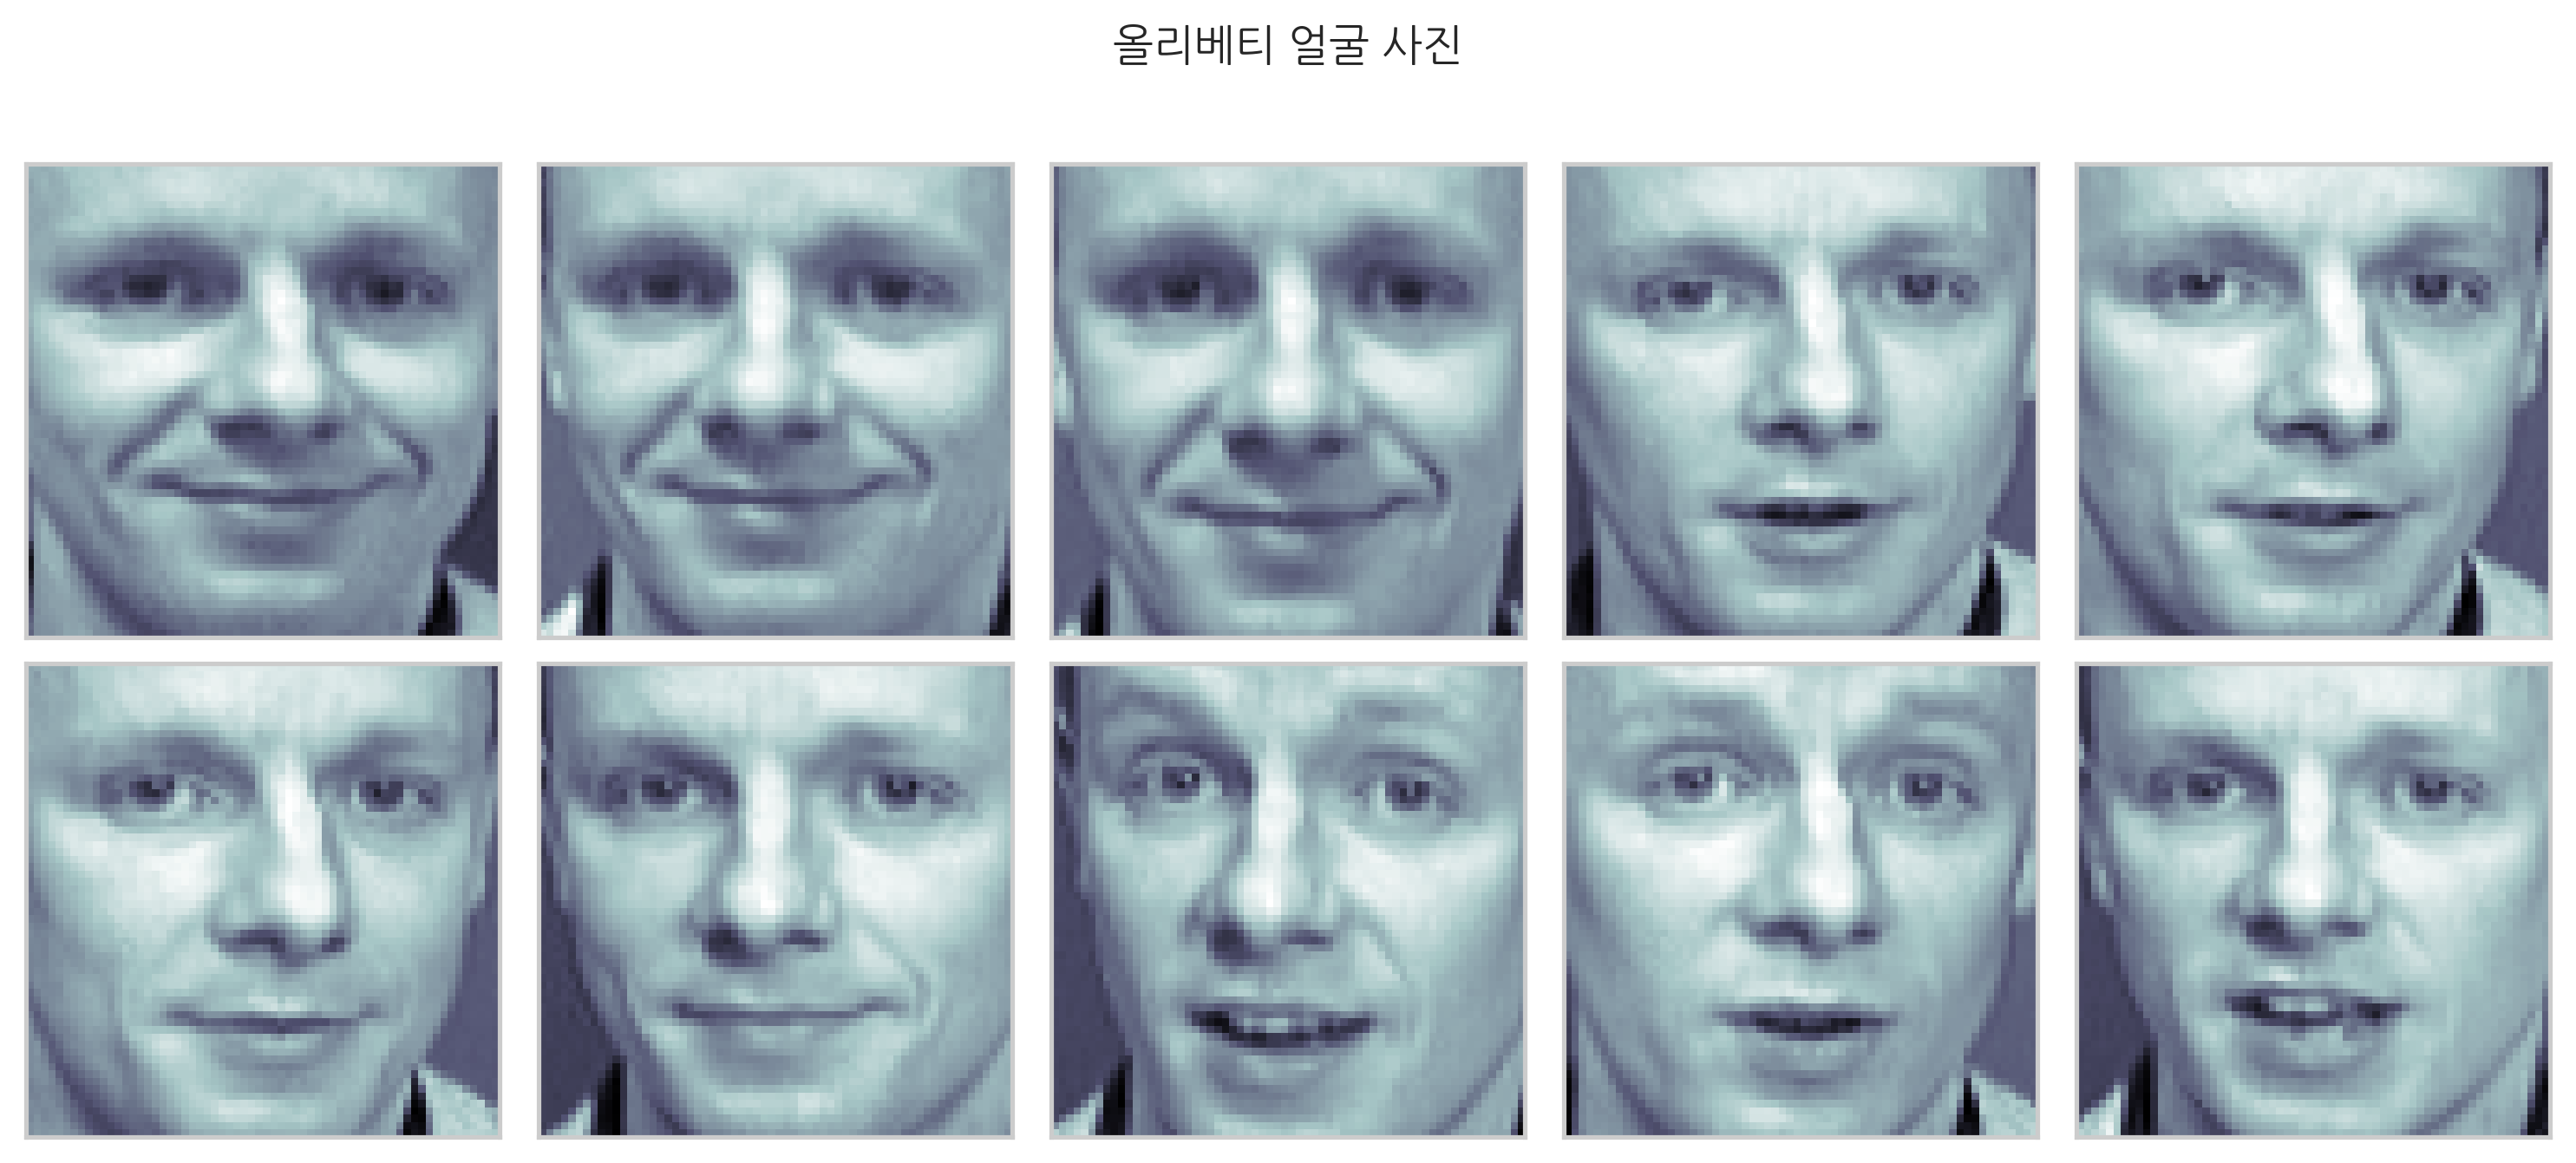

In [16]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

이 사진을 주성분이 2개인 PCA 분석을 하면 결과는 다음과 같다.

In [17]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

다음은 주성분 분석으로 근사화한 이미지를 표시한 것이다.

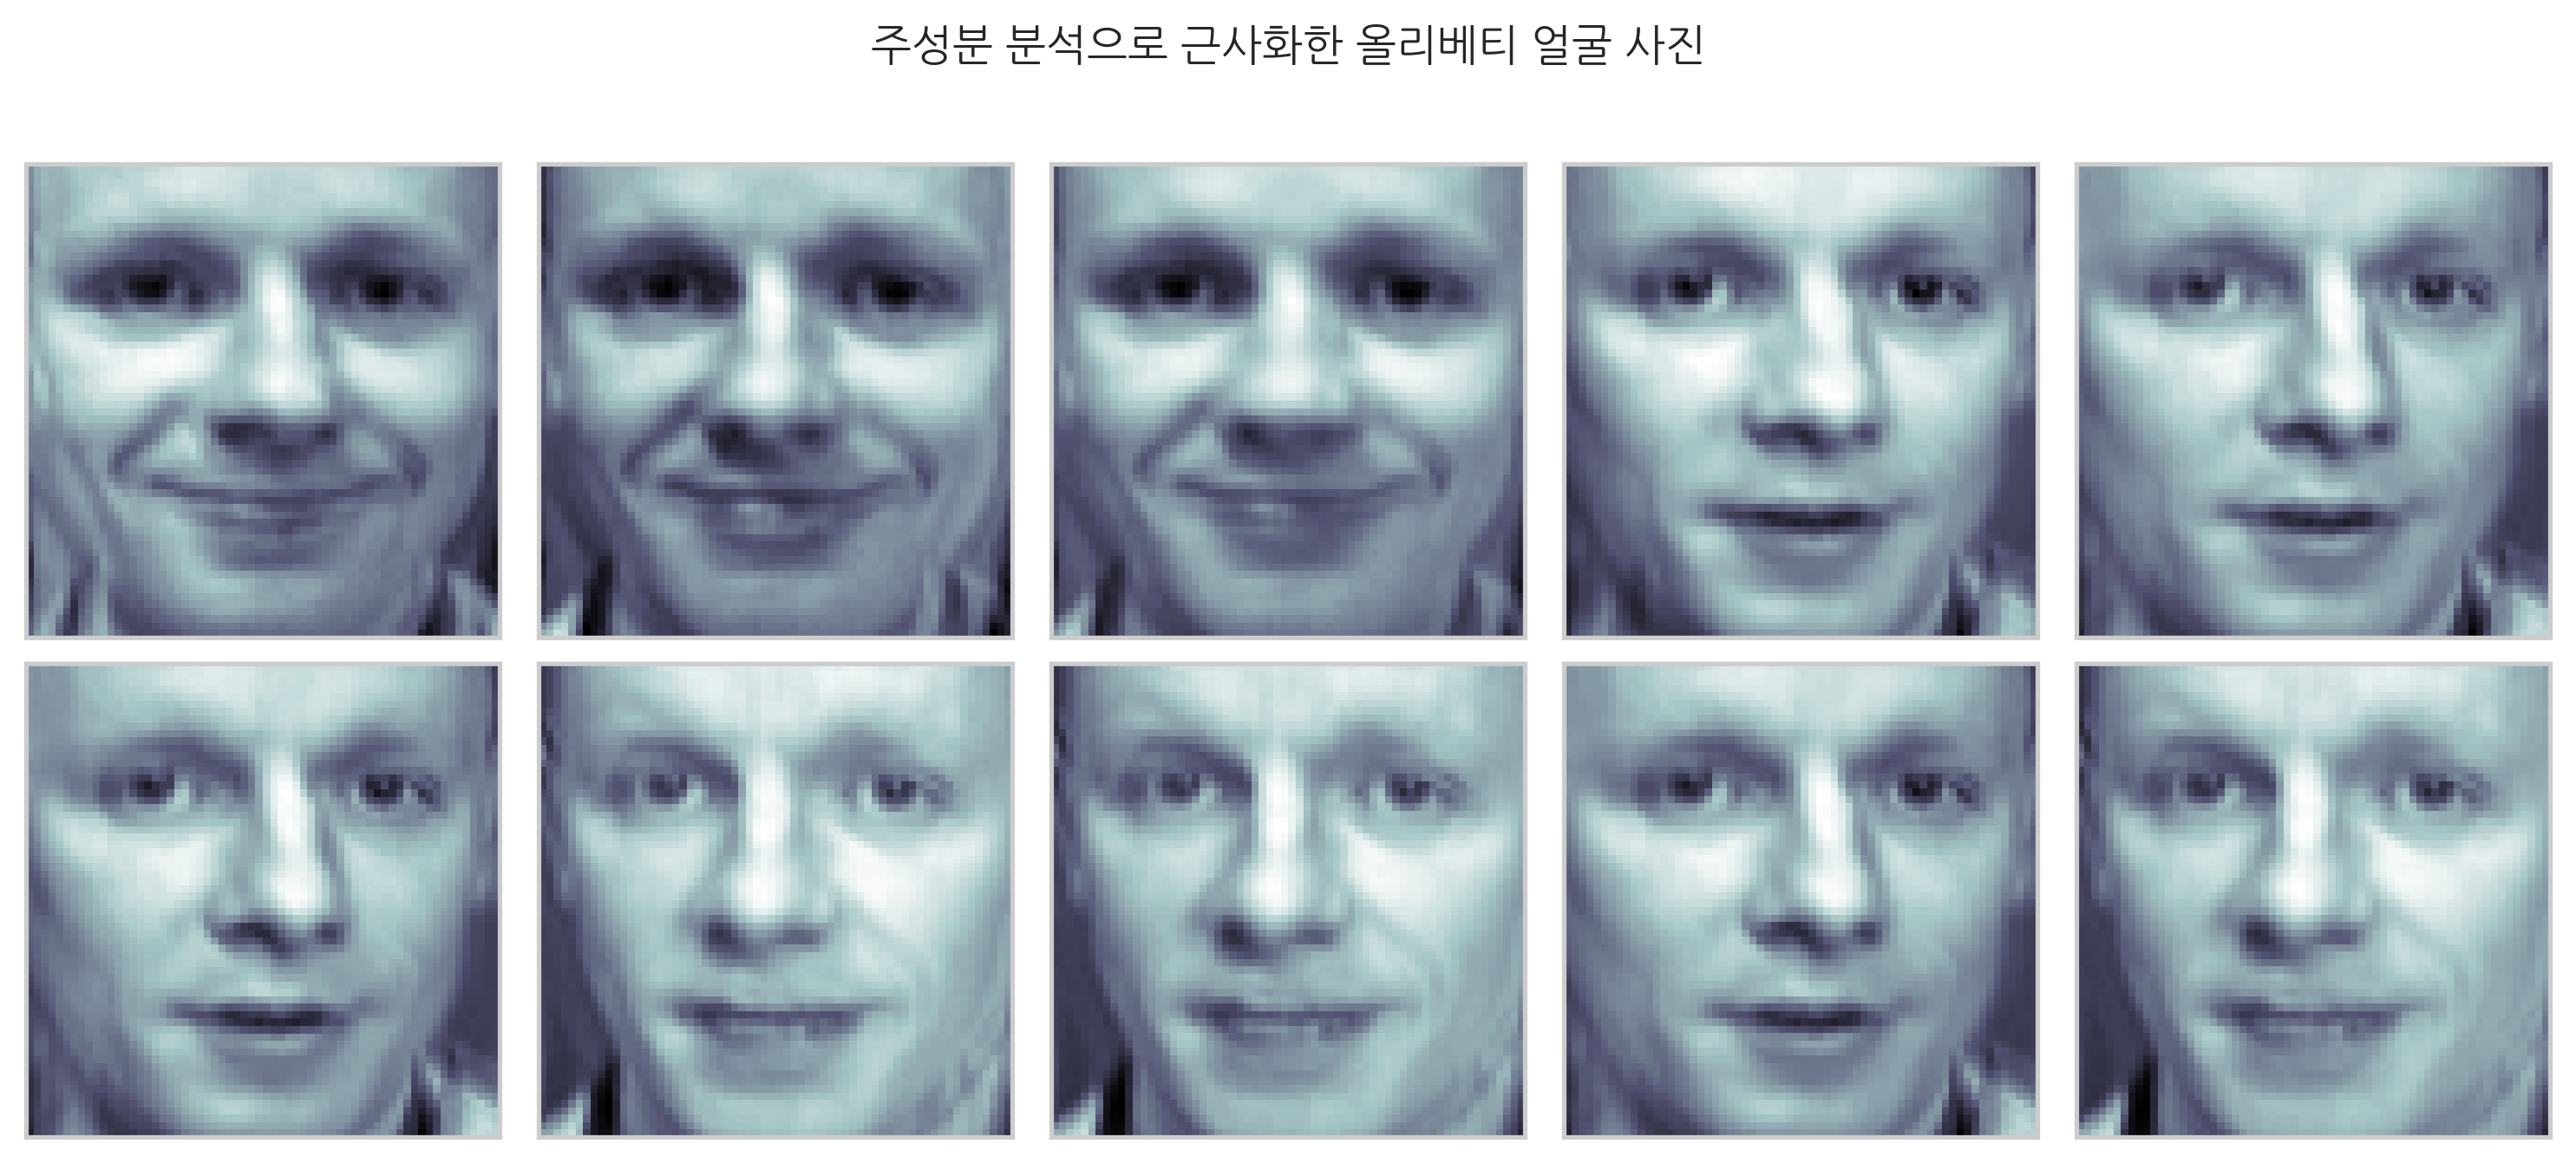

In [18]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

이 얼굴들은 모두 평균값과 2개의 주성분 얼굴의 각기 다른 선형조합이다. 
평균값과 2개의 주성분이 나타내는 얼굴을 이미지로 표시하면 다음과 같다. 주성분이 나타내는 얼굴을  **아이겐페이스(Eigen Face)**라고도 한다.

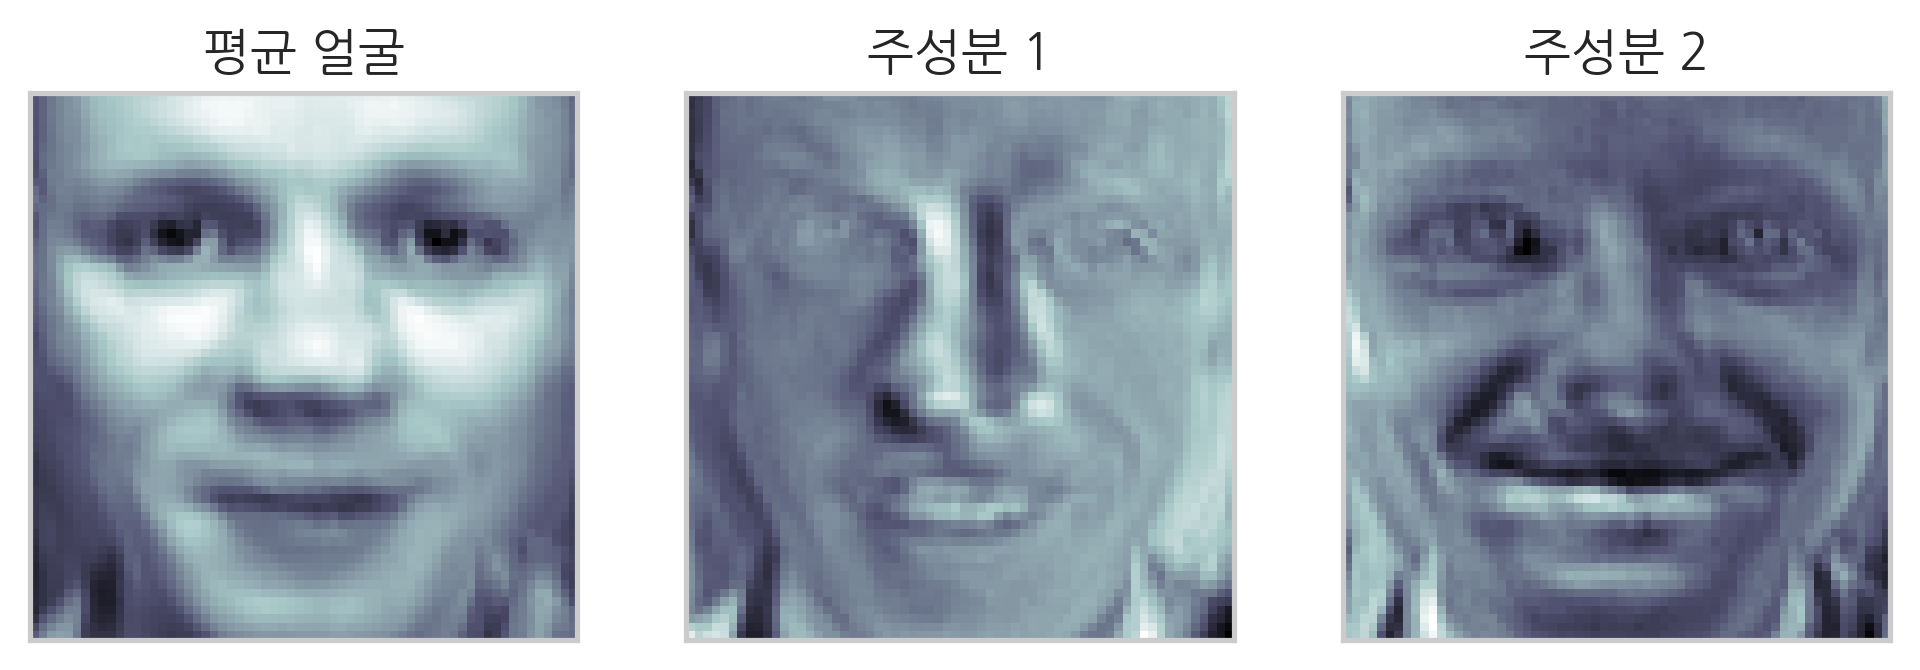

In [19]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

이 그림만 보아서는 주성분 얼굴이 각각 어떤 의미를 가지는지 알기 어려우므로 평균 얼굴에 주성분 얼굴을 더한 모습을 같이 그려보자. 우선 평균 얼굴에 첫 번째 주성분을 더하면 다음과 같다.

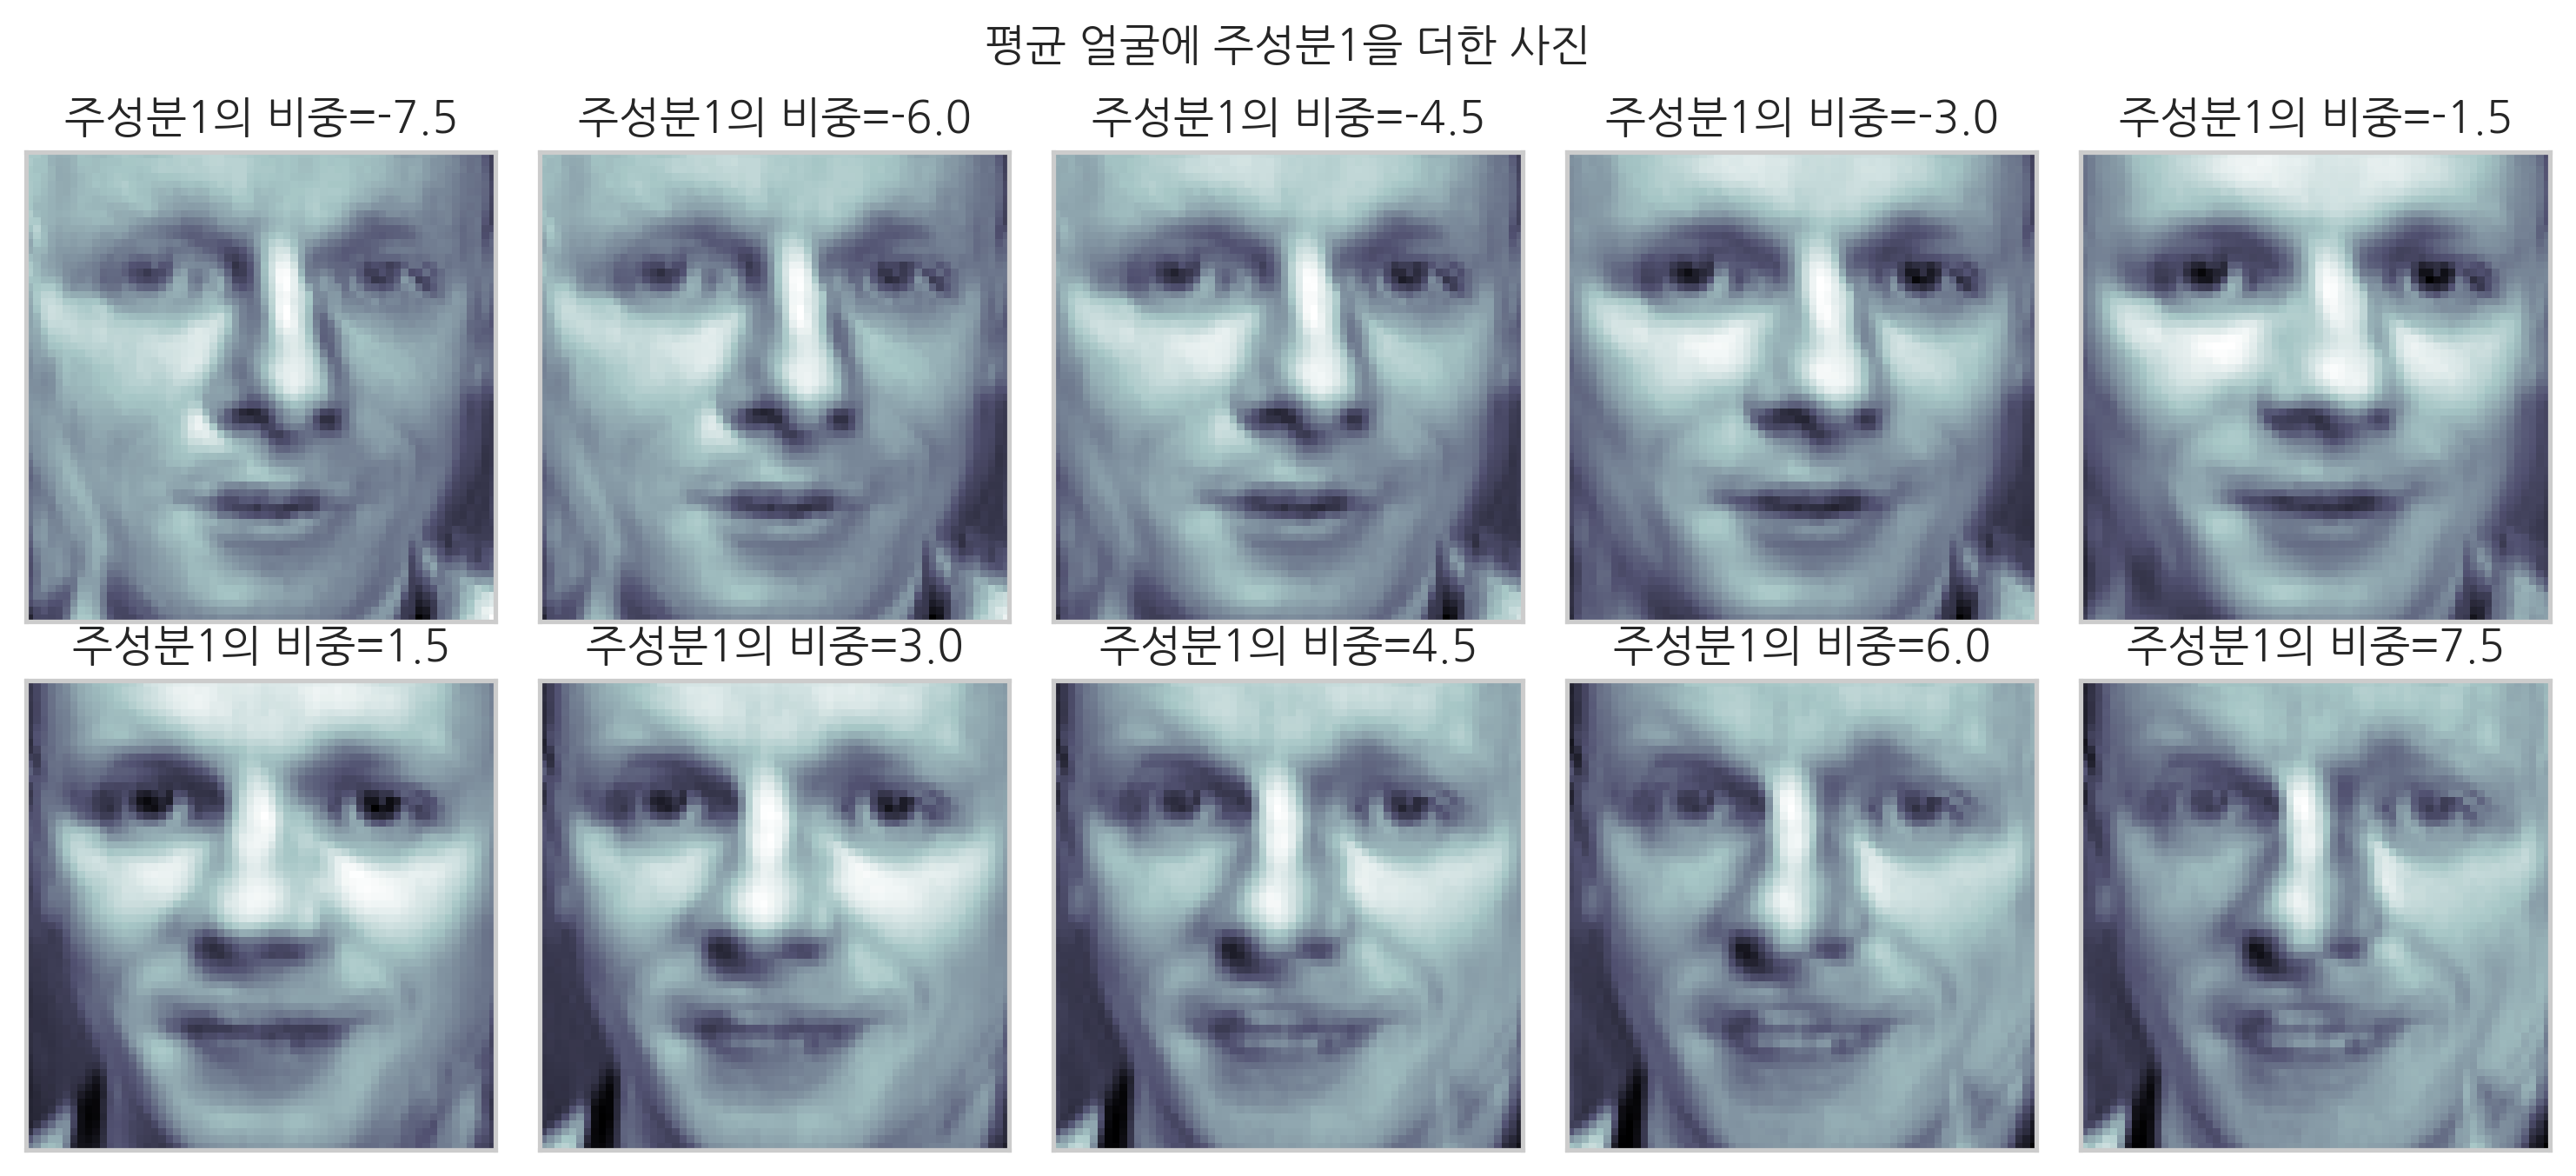

In [20]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

이 이미지들로부터 첫 번째 주성분은 왼쪽과 오른쪽에서 바라본 얼굴 이미지의 차이를 나타낸다는 것을 알 수 있다. 두 번째 주성분을 평균 얼굴에 더하면 다음과 같다.

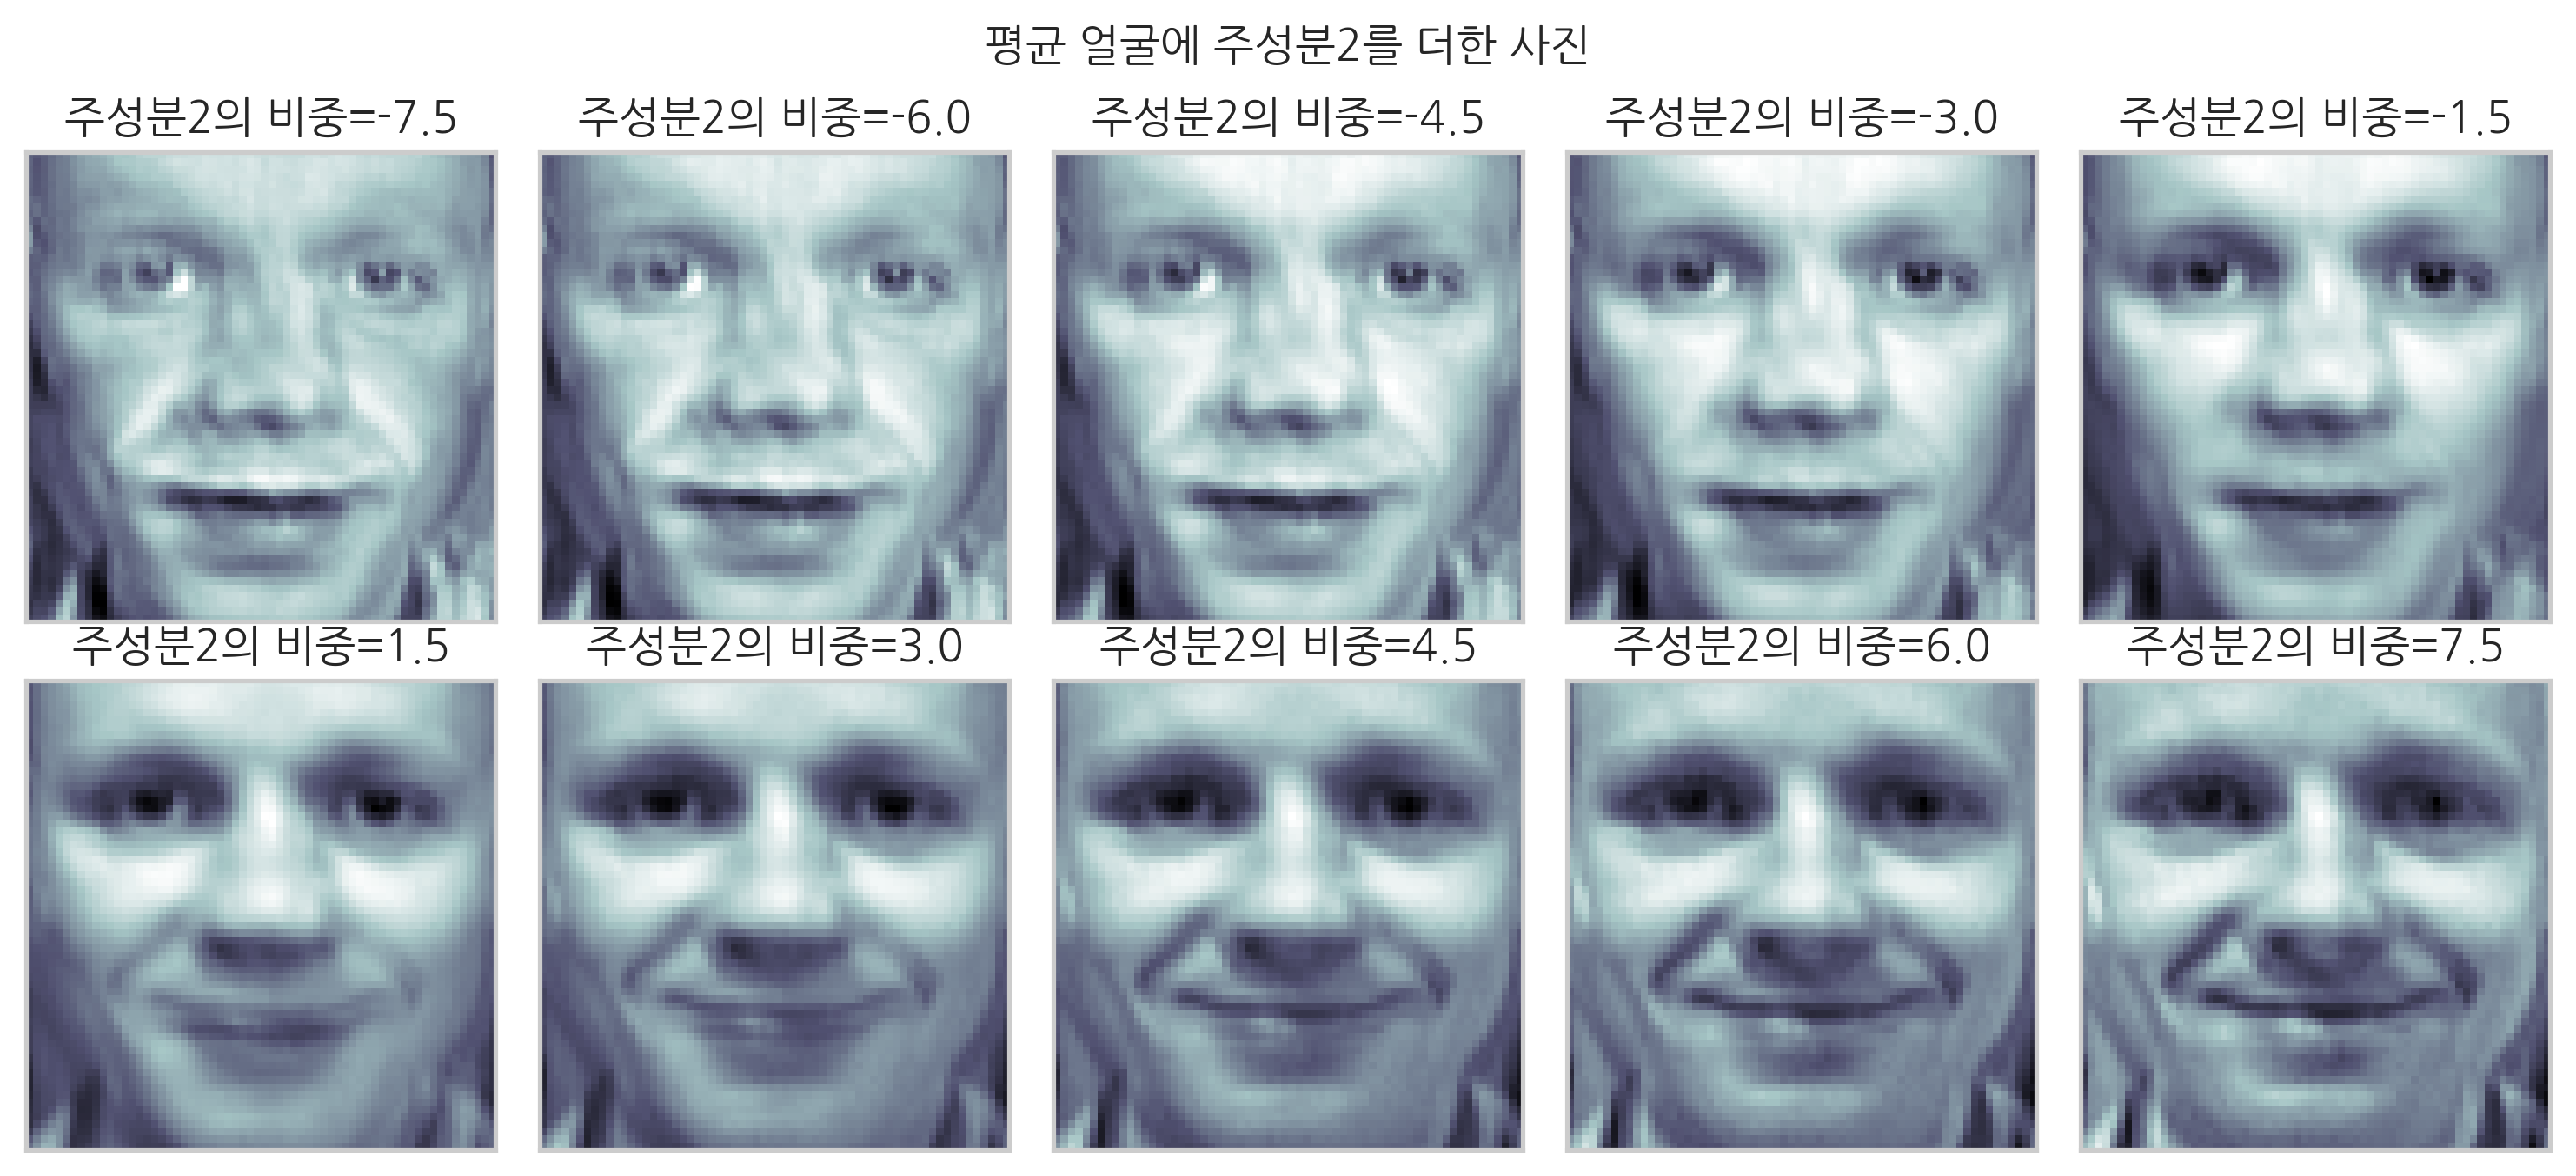

In [21]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w))
plt.suptitle("평균 얼굴에 주성분2를 더한 사진")
plt.tight_layout()
plt.show()

이 이미지들로부터 두 번째 주성분은 미소짓는 얼굴과 그렇지 않은 얼굴 이미지의 차이를 나타낸다는 것을 알 수 있다. 

#### 연습 문제 3.5.2

올리베티 얼굴 이미지에서 다른 사람의 얼굴을 선택하여 위와 같이 두 가지 주성분을 구하라. 각 주성분은 어떤 이미지 특성을 나타내는가?

### 주식 가격의 PCA

PCA는 다양한 분야에서 사용된다. 이번에는 금융분야에서 어떻게 쓰이는지 알아보자. 우선 미국(US), 일본(JP), 유럽(EZ), 한국(KR)의 과거 20년간 주가를 살펴보자.

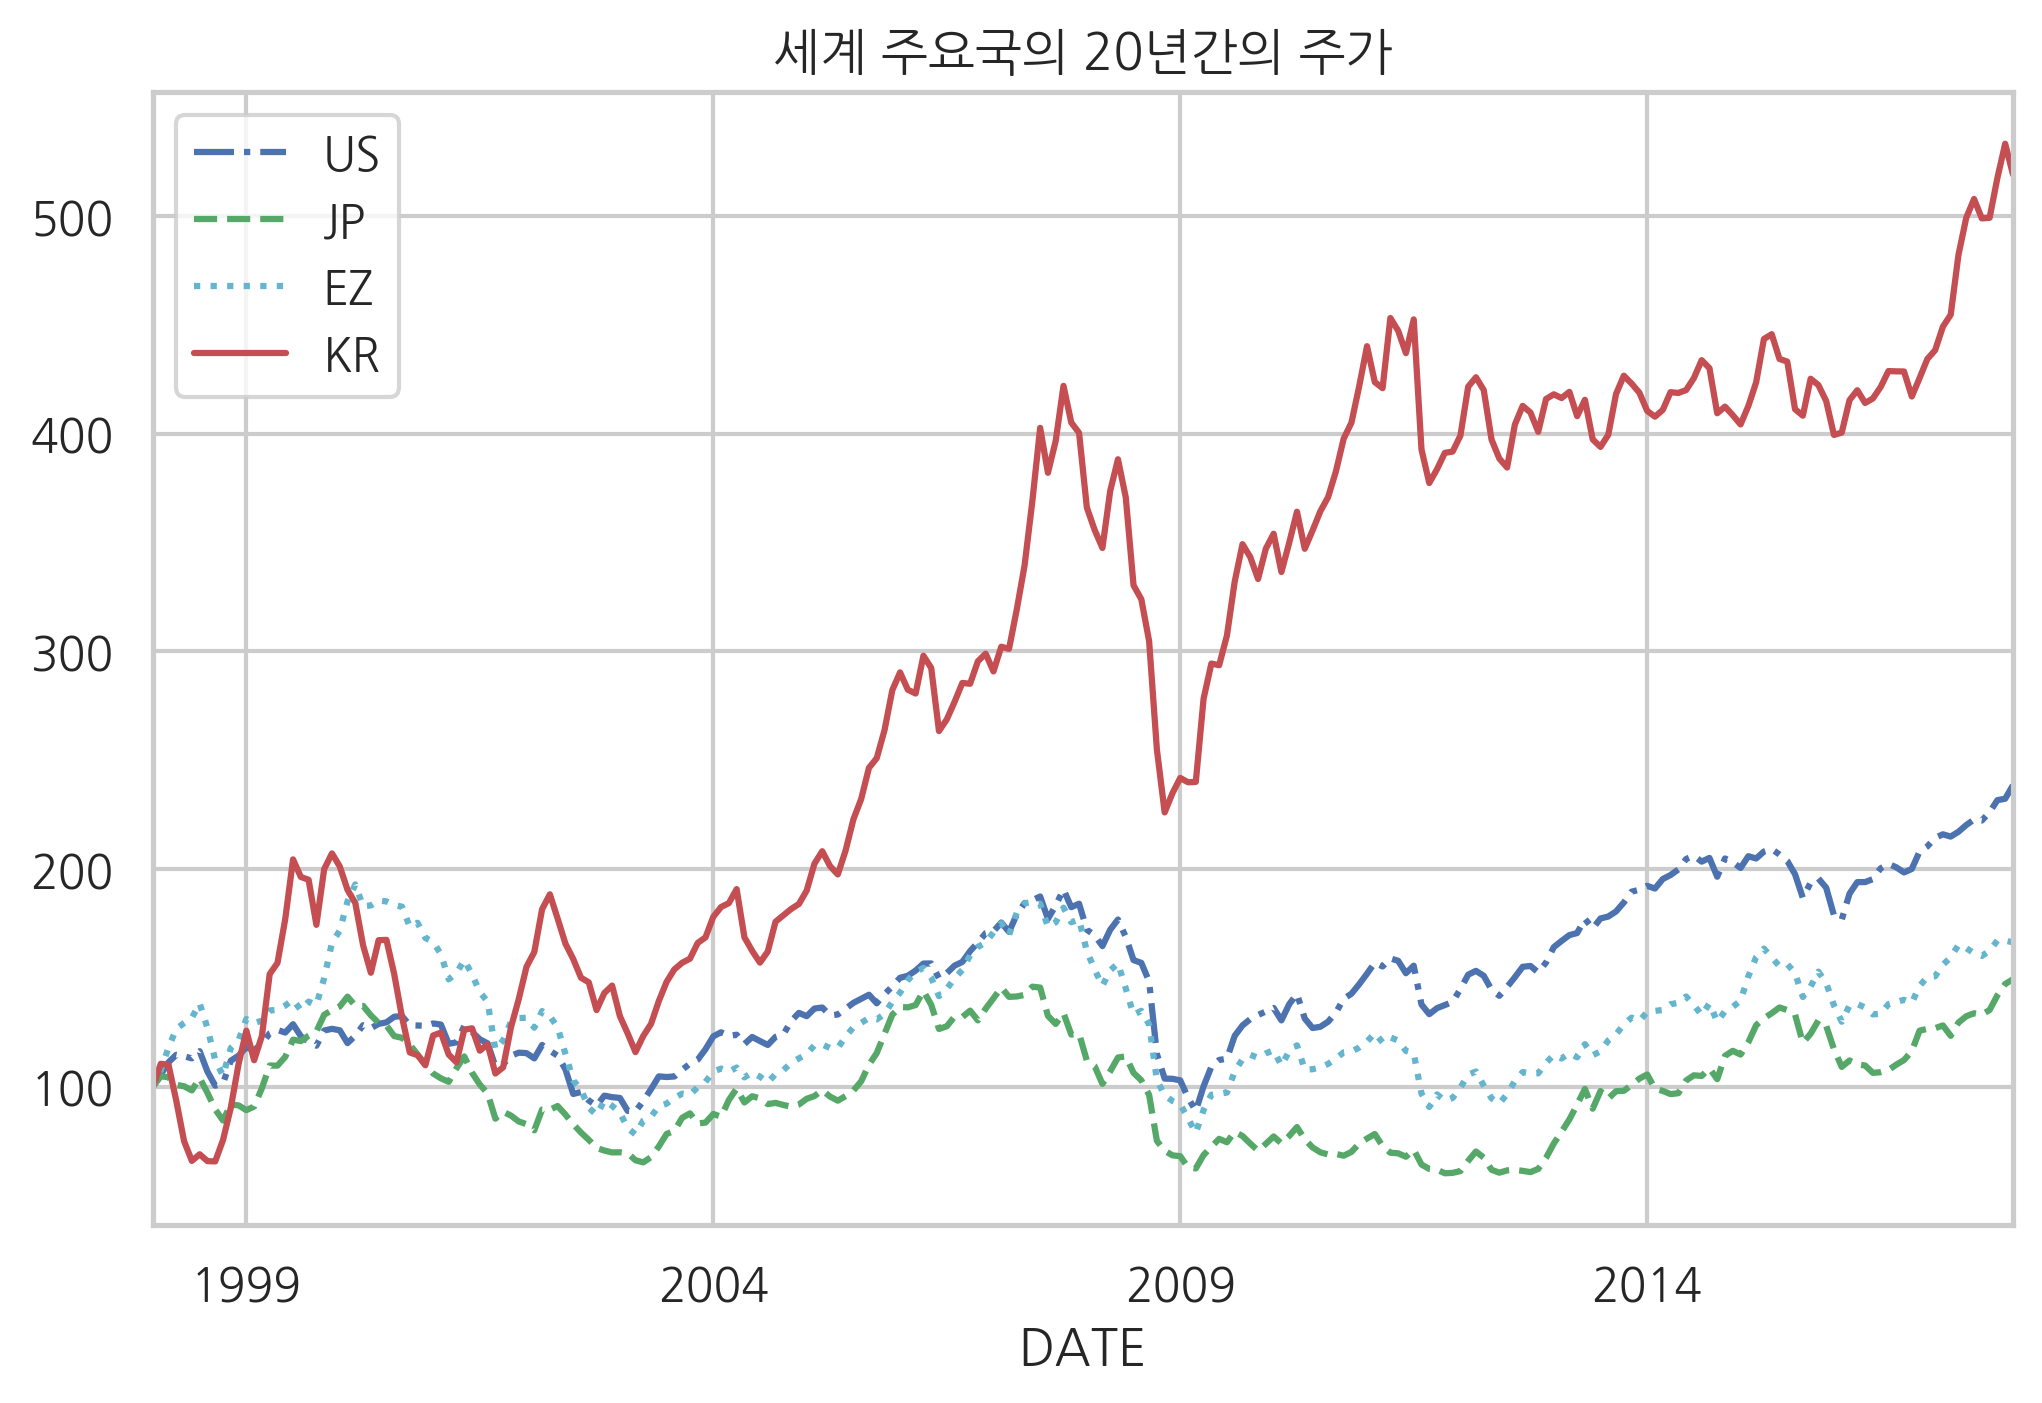

In [22]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

앞의 차트는 시작시점의 주가가 100이 되도록 크기를 조정하였다. 이 데이터로부터 연간 주식수익률 데이터를 구하면 다음처럼 $20 \times 4$ 크기의 특징행렬을 구할 수 있다.

In [23]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


이 연간 주식수익률 데이터를 그래프로 나타내면 다음과 같다. 붓꽃의 경우보다 (2차원에서 20차원으로) 차원은 증가했지만 각 표본이 가지는 측정 데이터 벡터의 모양(비율)이 비슷하다는 것을 알 수 있다. 붓꽃이 측정 데이터의 값을 결정하는 "크기"라는 잠재변수를 가지고 있는 것처럼 각 나라의 수익률은 "경제적 요인"이라고 하는 공통된 잠재변수에 의해서 결정되기 때문이다.

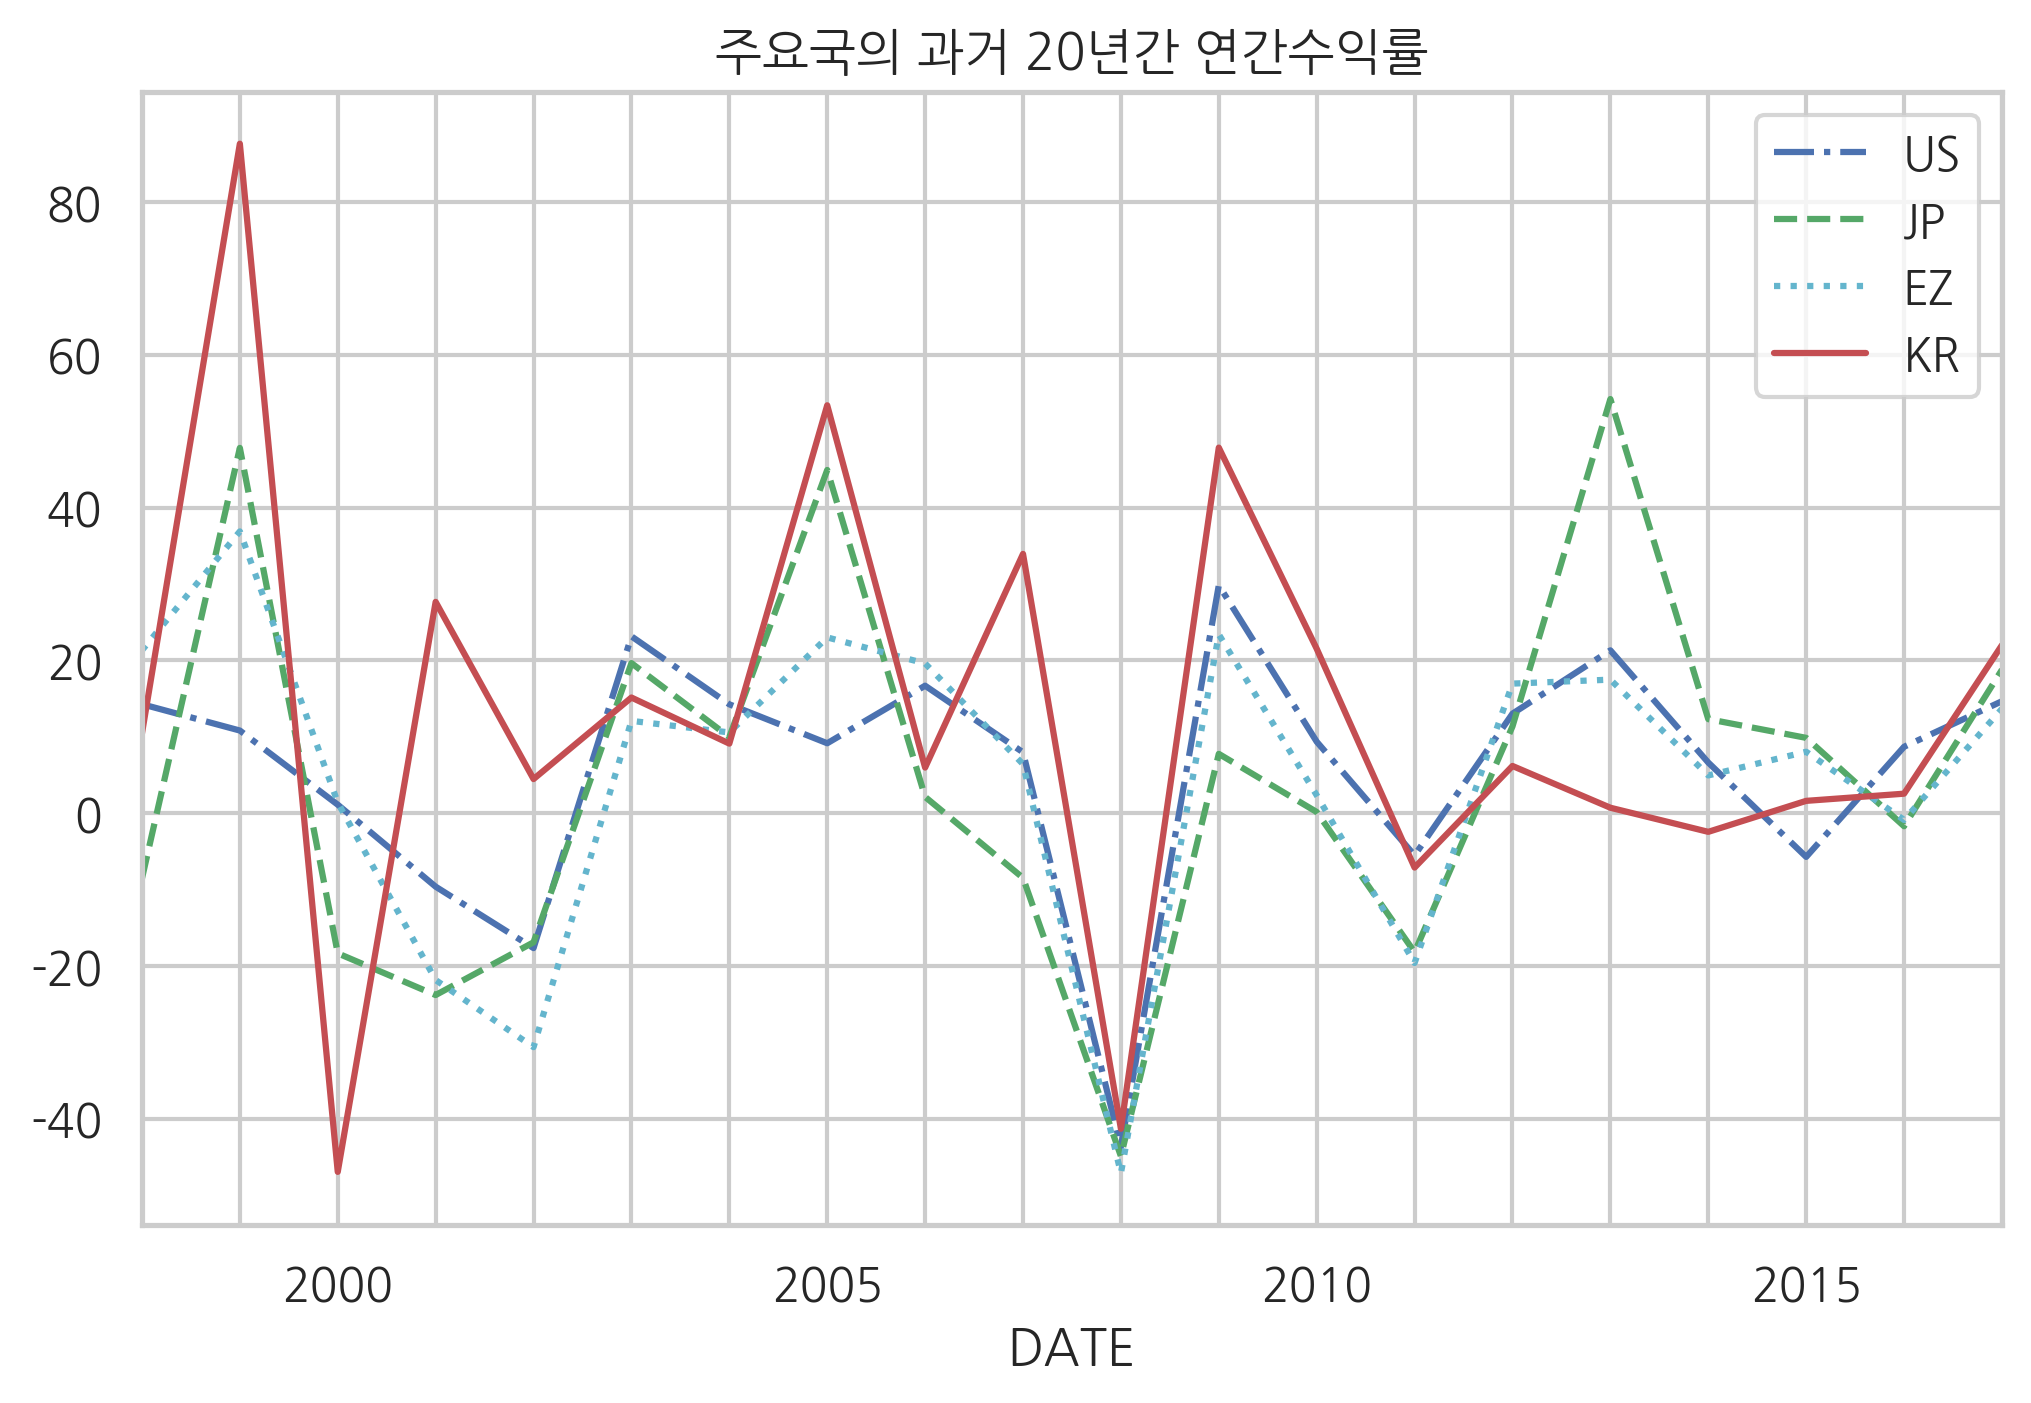

In [24]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

PCA 분석을 통해 모든 나라의 주가 움직임 기저에 깔려있는 성분을 살펴보자.

In [25]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

일단 세계주가의 공통요인은 평균값으로 구할 수 있다.

In [26]:
m = pca2.mean_

그리고 나라별로 주가를 다르게 하는 요인은 주성분으로 구할 수 있다.

In [27]:
p1 = pca2.components_[0]

이 두 가지 성분을 차트로 나타내보자. 평균주가로부터 주성분이 더해질수록 어떻게 주가의 형태가 바뀌는지 살펴보면 다음과 같다. 굵은 선으로 표시된 주가가 평균 주가이고 나머지 주가는 주성분이 점점 많이 추가됨에 따라 어떤 주가 형태로 변하는지를 표시한 것이다. 여기에서는 주성분의 모습을 잘 보기 위해 주성분을 과장하여 추가하였다. 

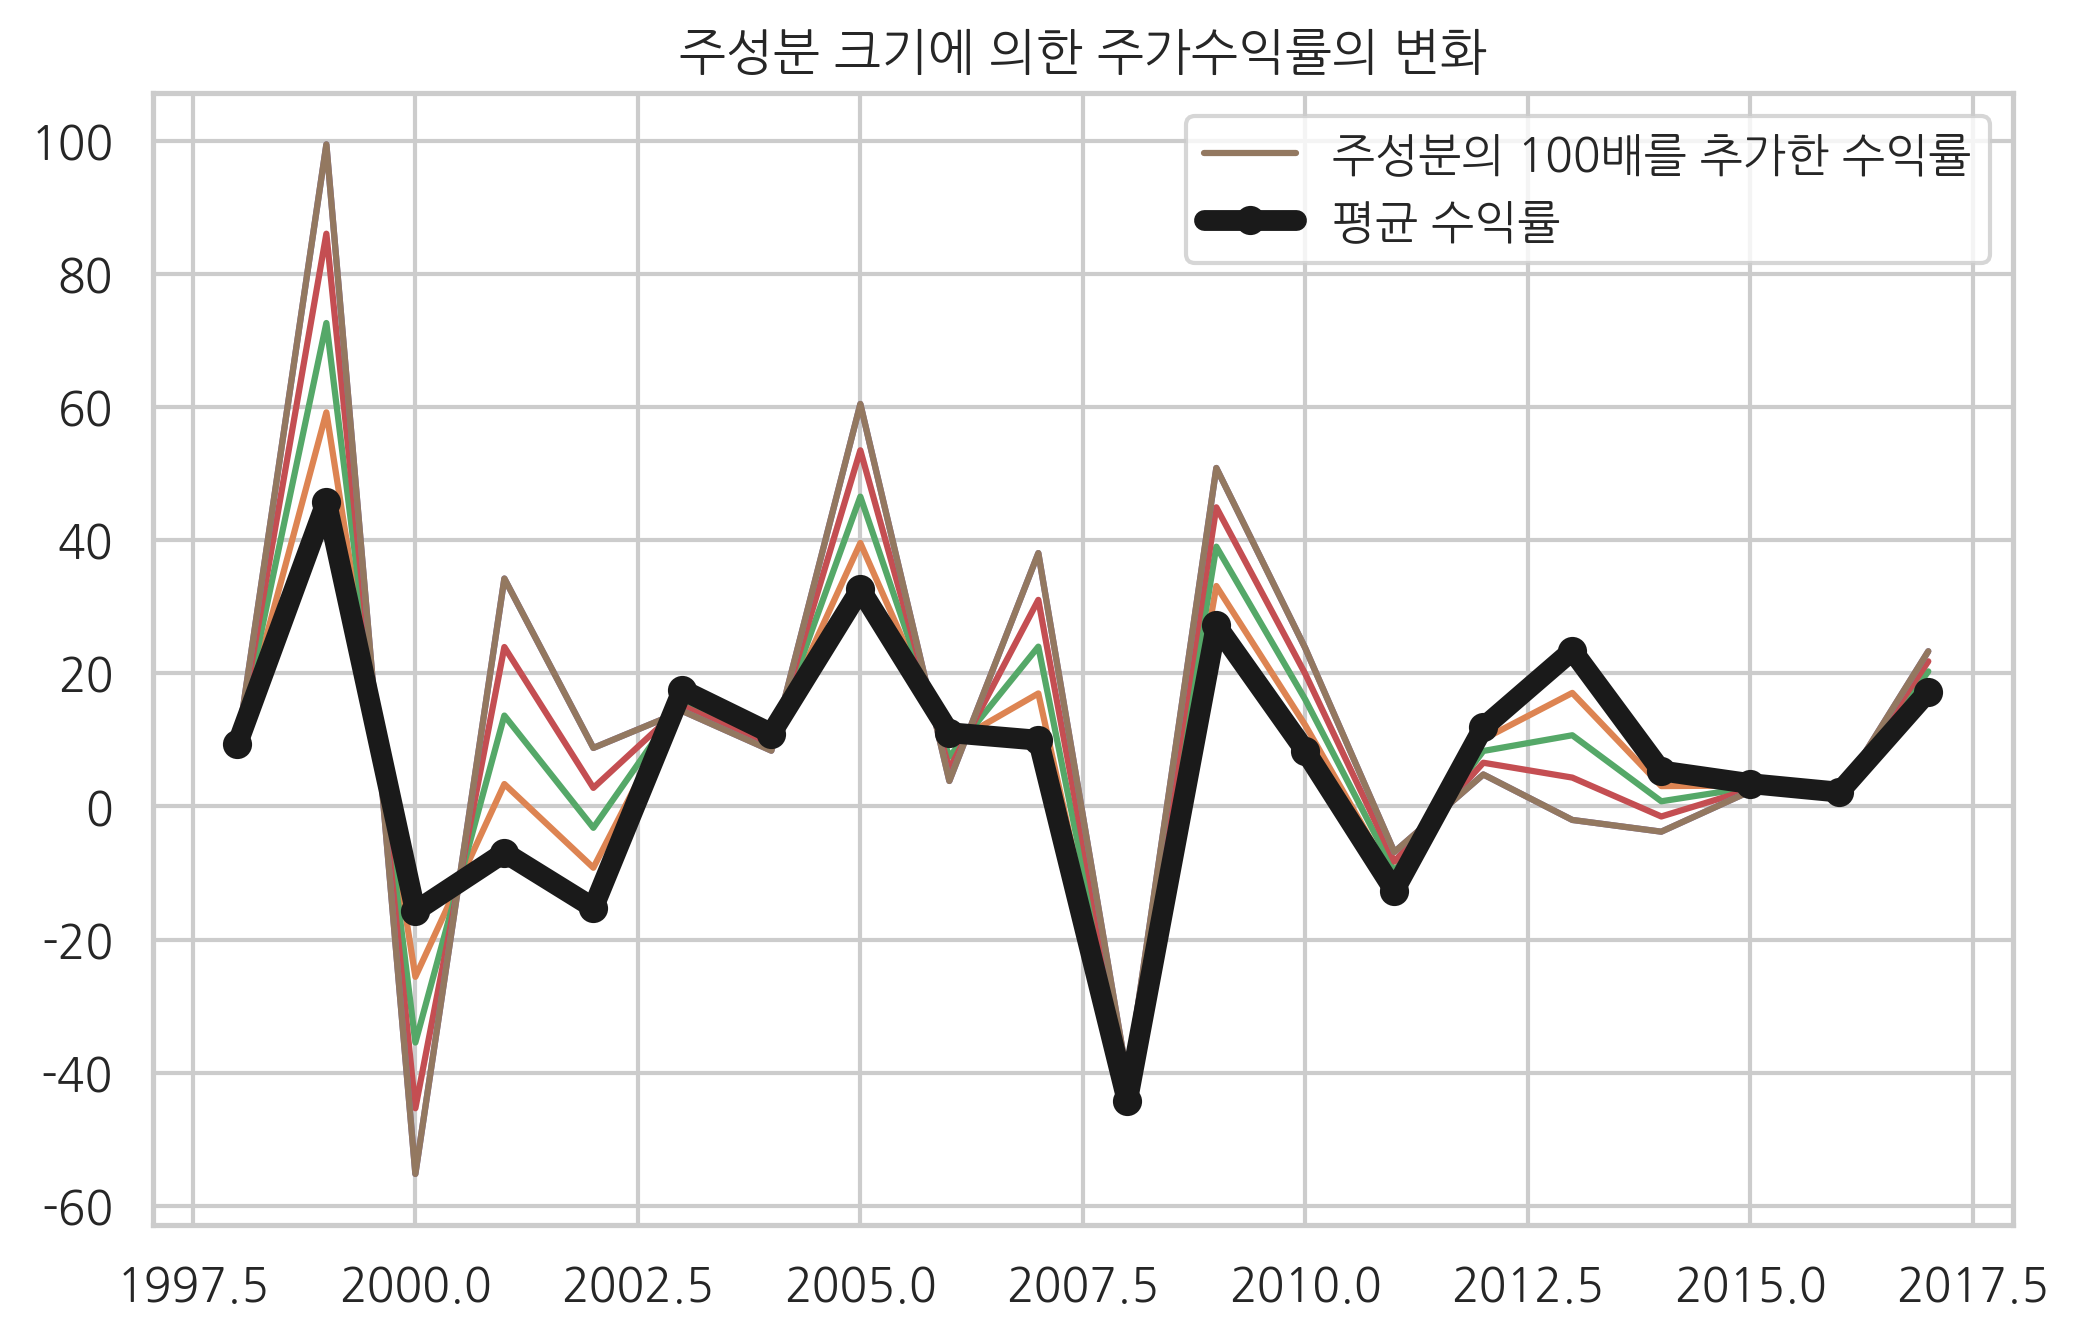

In [28]:
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

이 주성분이 가지는 의미를 살펴보기 위해 각 나라의 주성분 비중을 구한다.

In [29]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.413784
JP -20.943197
EZ -26.917702
KR  81.274683


한국은 주성분의 비중이 80이 넘고 나머지 국가들은 모두 주성분의 성분이 음수임을 알 수 있다. 
또한 주성분을 이용하여 구한 근사 주가를 표시하면 다음과 같다.

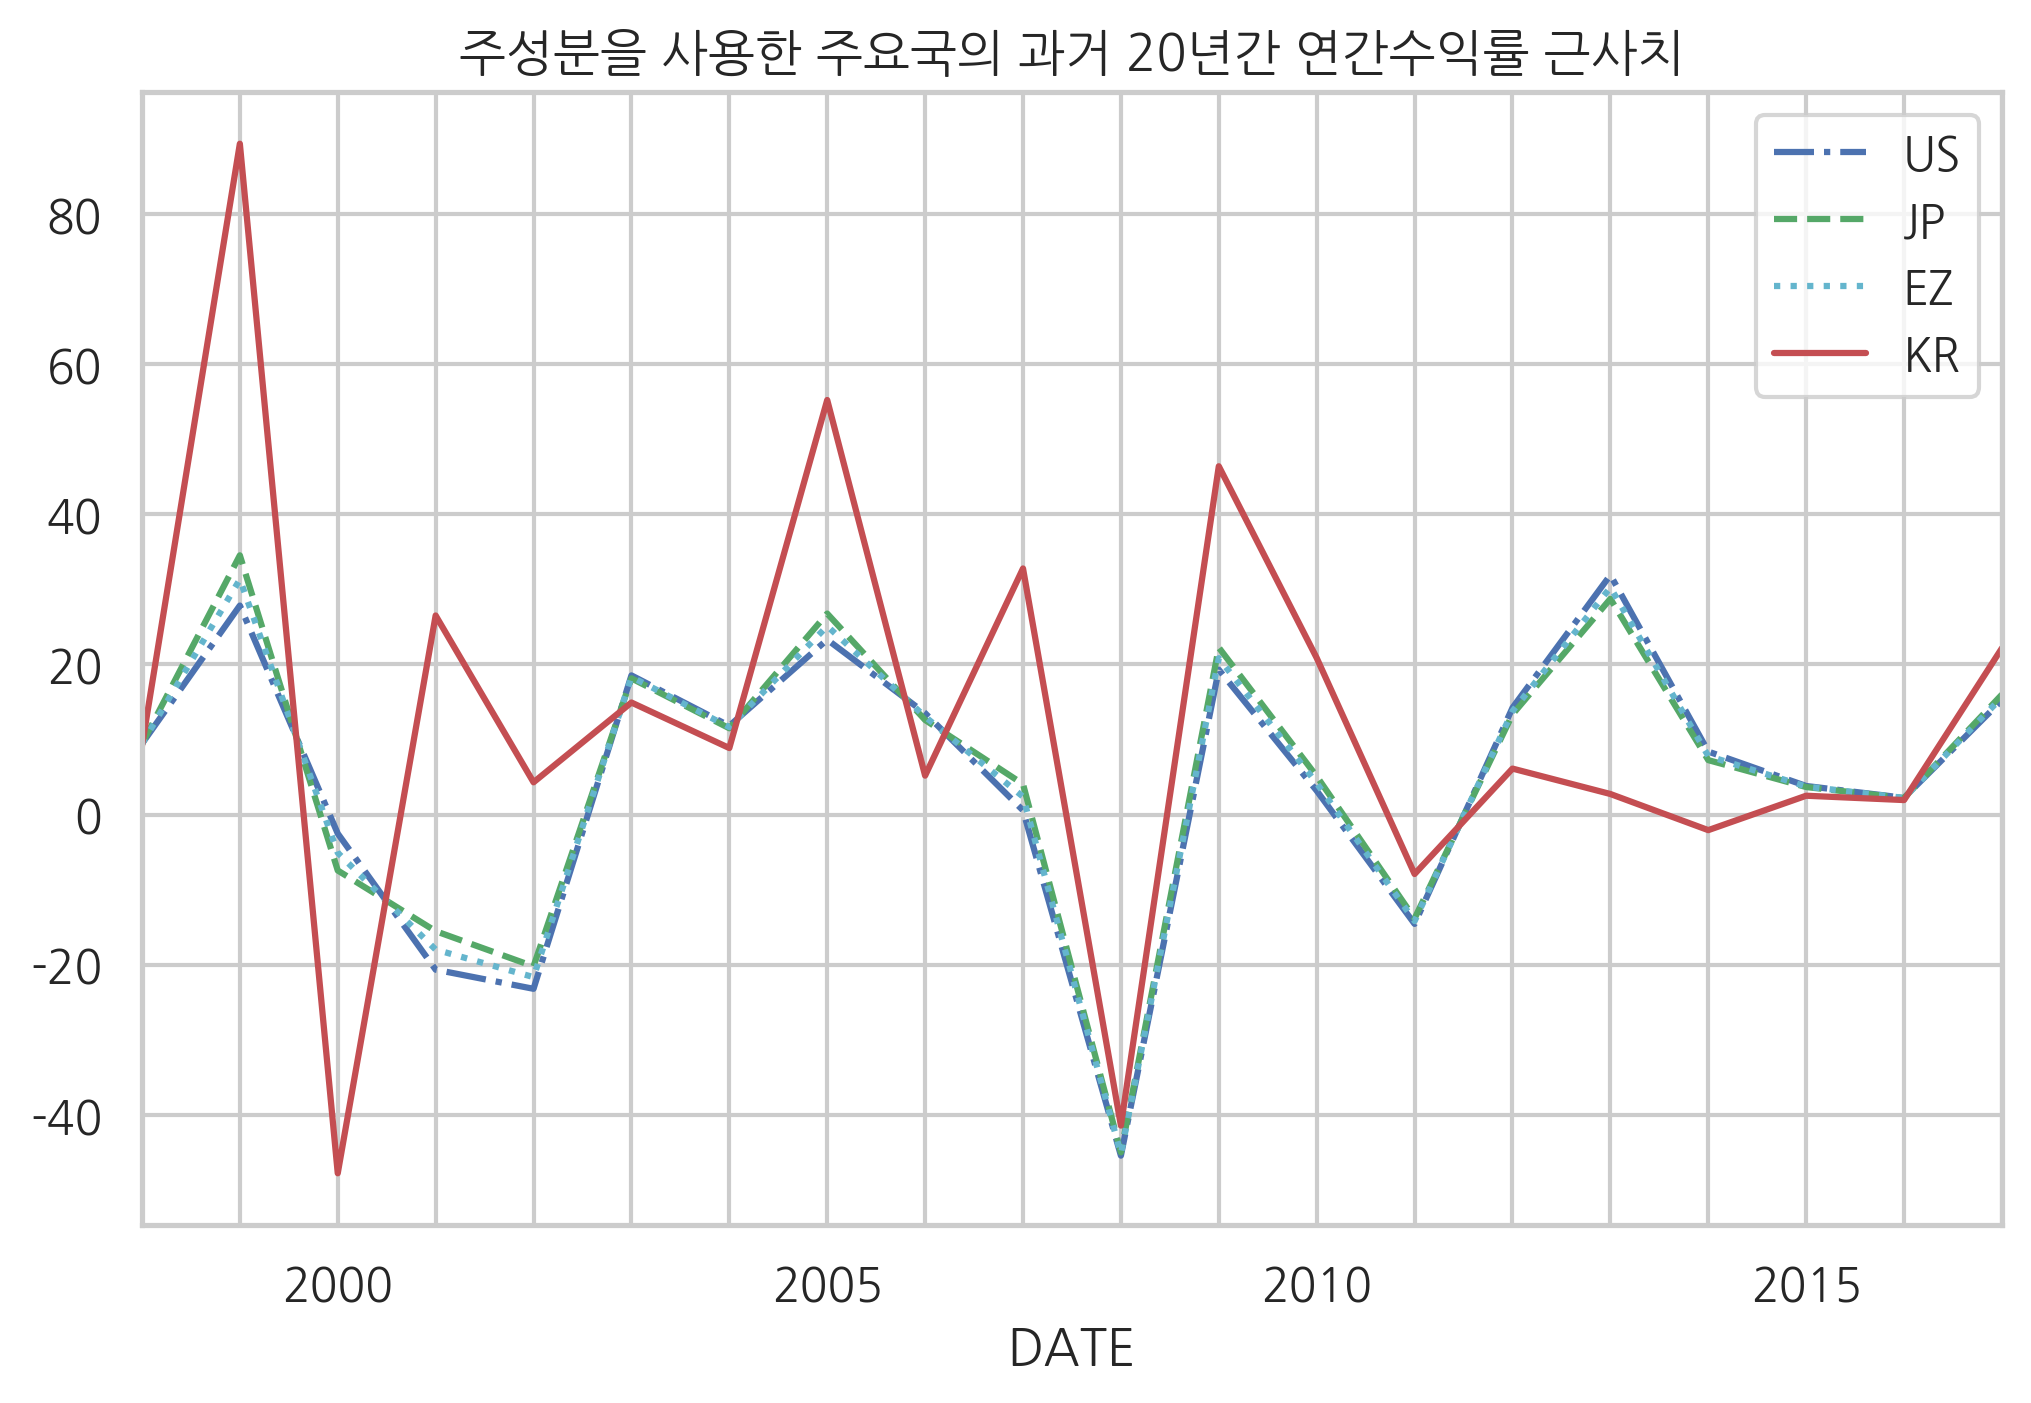

In [30]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()

이 결과로부터 우리가 구한 주성분은 '미국, 일본, 유럽'이라는 데이터로부터 '한국'이라는 데이터로 변화시키는 요인, 즉 중진국 요인이라 부를 수 있는 성분이라는 것을 명확하게 알 수 있다.